# CI7520 –Assignment 1: Classical Machine Learning

In [53]:
#Data, visualisation and data manipulation libraries
from sklearn import datasets
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.tree import plot_tree


#Data preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture

#Hyperparameter Tuning and processing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict

#Scoring and Performance Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer

In [4]:
def plot_decision_boundary(clf, x, y):
    #reference: Richard Johansson of University of Gothenburg
    #and Hands-On Machine learning with scikit-learn
    
    #Will take two columns and display the decision  boundary
    #from decision tree classifier
    feature_names = X.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = y[:,1].min(), y[:,1].max()
    
    step = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step = step),
                        np.arange(y_min, y_max, step = step))
    #np.c_ concatenate along axis = 1 (ie two 1d arrays form two columns)
    #np.ravel flattens. ie joins rows to make 1d array
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z.reshape(xx.shape)
    
    plt.figure(figsize = (10,10))
    #plot filled contours
    plt.contourf(xx, yy, z, cmpa = 'Paired_r', alpha = 0.25)
    plt.contour(xx,yy, z, colors = 'k', linewidth = 0.7)
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors = 'k')
    plt.xlabel
    plt.ylabel

In [5]:
def clustering_performance_evaluation(X, predicted_labels, print_output = False):
    #silhouette is mean intra-cluster distance - nearest-cluster distance
    #divided by the maximum of these two.
    #Values between 1 and -1. 1 being best score achievable.
    sil_score = silhouette_score(X, predicted_labels)
        
    #Calinski-Harabasz score
    #Ratio of sum of the inter-cluster dispersion and intra-cluster dispersion
    #Higher values better
    cal_har_score = calinski_harabasz_score(X, predicted_labels)
    
    #David-Bouldin Score
    #Avg similarity within cluster. 
    #Similarity is ratio of intra-cluster to inter-cluster
    #Low values are better (minima is 0)
    db_score = davies_bouldin_score(X, predicted_labels)
      
    if print_output == True:
        print(f"Silhouette Score: {sil_score:.3f}\
        \nCalinski-Harabasz Score: {cal_har_score:.3f}\
        \nDavid-Bouldin Score: {db_score:.3f}")
    
    if print_output == False:
        return [sil_score, cal_har_score, db_score]

def classification_performance_evaluation(y_true, y_pred, print_output = False):
    #Both homogeneity and completeness have values 0 to 1. 
    #Larger values being preferable
    #V measure is a 'harmonic' mean of homogeneity and completeness
    h,c,v = homogeneity_completeness_v_measure(y_true, y_pred)
    
    #accuracy score displays % of labels correctly labelled.
    acc_score = accuracy_score(y_true, y_pred)
    
    #balanced accuracy to adjust for inbalanced classes
    bal_acc_score = balanced_accuracy_score(y_true, y_pred)
    
    #f1_score
    #Harmonic mean of precision and recall
    #Values of 0 to 1. 1 is best.
    score_f1 = f1_score(y_true, y_pred)
    
    if print_output == True:
        print(f"Homogeneity Score: {h:.3f}\
        \nCompleteness Score: {c:.3f}\
        \nV_measure Score: {v:.3f}\
        \nAccuracy Score: {acc_score:.3f}\
        \nBalanced Accuracy Score: {bal_acc_score:.3f}\
        \nF1 Score: {score_f1:.3f}")

    if print_output == False:
        return [h, c, v, acc_score, bal_acc_score, score_f1]

def classification_using_clustering_performance_evaluation(y_true, y_pred, print_output = False, classification = True):
    #Both homogeneity and completeness have values 0 to 1. 
    #Larger values being preferable
    #V measure is a 'harmonic' mean of homogeneity and completeness
    h,c,v = homogeneity_completeness_v_measure(y_true, y_pred)
    
    #accuracy score displays % of labels correctly labelled.
    acc_score = accuracy_score(y_true, y_pred)
    
    #balanced accuracy to adjust for inbalanced classes
    bal_acc_score = balanced_accuracy_score(y_true, y_pred)
    
    #f1_score
    #Harmonic mean of precision and recall
    #Values of 0 to 1. 1 is best.
    score_f1 = f1_score(y_true, y_pred)
    
    #if a clustering method selected that did not have information about labels select classification as False
    if classification == False:
        #Must take maximum of 1-score and score because clustering method is only labelling two groups without
        #assigning which is which
        acc_score = max(acc_score, (1-acc_score))
        bal_acc_score = max(bal_acc_score, (1-bal_acc_score))
        score_f1 = max(score_f1, (1-score_f1))
    
    #Adjusted rand score
    #Similarity between clusters by counting all pairs of clusters,
    #Higher values when greater proportion is in correct cluster
    adj_rand_score = adjusted_rand_score(y_true, y_pred)
    
    if print_output == True:
        print(f"Homogeneity Score: {h:.3f}\
        \nCompleteness Score: {c:.3f}\
        \nV_measure Score: {v:.3f}\
        \nAccuracy Score: {acc_score:.3f}\
        \nBalanced Accuracy Score: {bal_acc_score:.3f}\
        \nF1 Score: {score_f1:.3f}\
        \nAdjusted_rand_score : {adj_rand_score:.3f}")
    
    if print_output == False:
        return [h, c, v, acc_score, bal_acc_score, score_f1, adj_rand_score]
    
def plot_precision_recall(y_true, y_pred):
    #Plots the precision_recall_graph
    PrecisionRecallDisplay.from_predictions(y_true, y_pred)
    plt.ylim(0,1)
    plt.show()

def plot_roc_and_print_auc(y_true, y_pred):
    #Plots the Receiver Operating Characteristic
    #And prints the ROC_AUC (area under curve) value
    #Values of 0 to 1. 1 is best
    false_positive_rate, true_positive_rate, threshold  =  roc_curve(y_true, y_pred)
    area_under_curve = round(roc_auc_score(y_true, y_pred), 3)
    zero_to_one_array = np.linspace(0,1,100)
    
    #plot x = y graph
    plt.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
    plt.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC Score')
    plt.show()
    
def plot_confusion_matrix(y_true, y_pred):    
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()

In [66]:
#Load data as json
bcd = datasets.load_breast_cancer()
#Load data as frames
X, y = datasets.load_breast_cancer(return_X_y = True, as_frame = True)
#Convert frames to single dataframe
df = pd.concat([X, y], axis =1)

In [67]:
X.shape

(569, 30)

In [68]:
#Print first 3 rows
df.head(3)

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0

[3 rows x 31 columns]

In [8]:
print("In the Breast Cancer Dataset:")
print(f"Number of samples is: {len(bcd.data)}")
print(f"Number of features columns is: {len(bcd.data[0])}")
print(f"Number of target columns is: {bcd.target.ndim}")
print(f"Number of classes is: {len(np.unique(bcd.target))}")
print(f"Class names are:  {np.unique(bcd.target_names[0])}, {np.unique(bcd.target_names[1])} (0 and 1)")
print(f"\nClass type and the respective number of samples in each class is:\n{df.target.value_counts()}")
print(f"\nVariable name and number of null values are:\n{df.isna().sum()}")
print(f"\nFeature names are:\n{bcd.feature_names}")
print(f"\nDataset description is\n{bcd.DESCR}")

In the Breast Cancer Dataset:
Number of samples is: 569
Number of features columns is: 30
Number of target columns is: 1
Number of classes is: 2
Class names are:  ['malignant'], ['benign'] (0 and 1)

Class type and the respective number of samples in each class is:
1    357
0    212
Name: target, dtype: int64

Variable name and number of null values are:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst

In [9]:
X.describe()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

# Feature Engineering
Many of these features relate to the same aspect of the data.

Therefore there is extra information that can be extracted.


In [10]:
a_string = 'worst radius'
X[a_string]

0      25.380
1      24.990
2      23.570
3      14.910
4      22.540
        ...  
564    25.450
565    23.690
566    18.980
567    25.740
568     9.456
Name: worst radius, Length: 569, dtype: float64

In [69]:
#create new 'difference' columns
original_col_length = len(X.columns)
for i in range(original_col_length - 20):
    new_col_name = str(''.join([X.columns[i+20][:5], ' - ',X.columns[i]]))
    print(new_col_name)
    X[new_col_name] = X[X.columns[i+20]] - X[X.columns[i]]

worst - mean radius
worst - mean texture
worst - mean perimeter
worst - mean area
worst - mean smoothness
worst - mean compactness
worst - mean concavity
worst - mean concave points
worst - mean symmetry
worst - mean fractal dimension


In [70]:
#create new 'ratio' columns
for i in range(original_col_length - 20):
    #this time require the 
    new_col_name = str(''.join(['ratio of ', X.columns[i+20][:5].strip(), ' to ',X.columns[i]]))
    print(new_col_name)
    X[new_col_name] = X[X.columns[i+20]] / X[X.columns[i]]

ratio of worst to mean radius
ratio of worst to mean texture
ratio of worst to mean perimeter
ratio of worst to mean area
ratio of worst to mean smoothness
ratio of worst to mean compactness
ratio of worst to mean concavity
ratio of worst to mean concave points
ratio of worst to mean symmetry
ratio of worst to mean fractal dimension


In [72]:
mean_features = list(X.columns[:10])
error_features = list(X.columns[10:20])
worst_features = list(X.columns[20:30])


X[['min_of_mean_features', \
   'mean_of_mean_features', \
   'max_of_mean_features', \
   'std_of_mean_features', \
   'multiple_of_mean_features', \
   'sum_of_mean_features']] = X[mean_features].agg(['min', \
                                                    'mean', \
                                                    'max', \
                                                    'std', \
                                                    'prod', \
                                                    'sum'], axis = 1)

In [14]:
X[['min_of_error_features', \
   'mean_of_error_features', \
   'max_of_error_features', \
   'std_of_error_features', \
   'multiple_of_error_features', \
   'sum_of_error_features']] = X[error_features].agg(['min', \
                                                    'mean', \
                                                    'max', \
                                                    'std', \
                                                    'prod', \
                                                    'sum'], axis = 1)

In [15]:
X[['min_of_worst_features', \
   'mean_of_worst_features', \
   'max_of_worst_features', \
   'std_of_worst_features', \
   'multiple_of_worst_features', \
   'sum_of_worst_features']] = X[worst_features].agg(['min', \
                                                    'mean', \
                                                    'max', \
                                                    'std', \
                                                    'prod', \
                                                    'sum'], axis = 1)

In [16]:
len(X.columns)

68

In [17]:
df = pd.concat([X, y], axis = 1)

In [18]:
malignant = df[df['target'] == 0]
benign = df[df['target'] == 1]

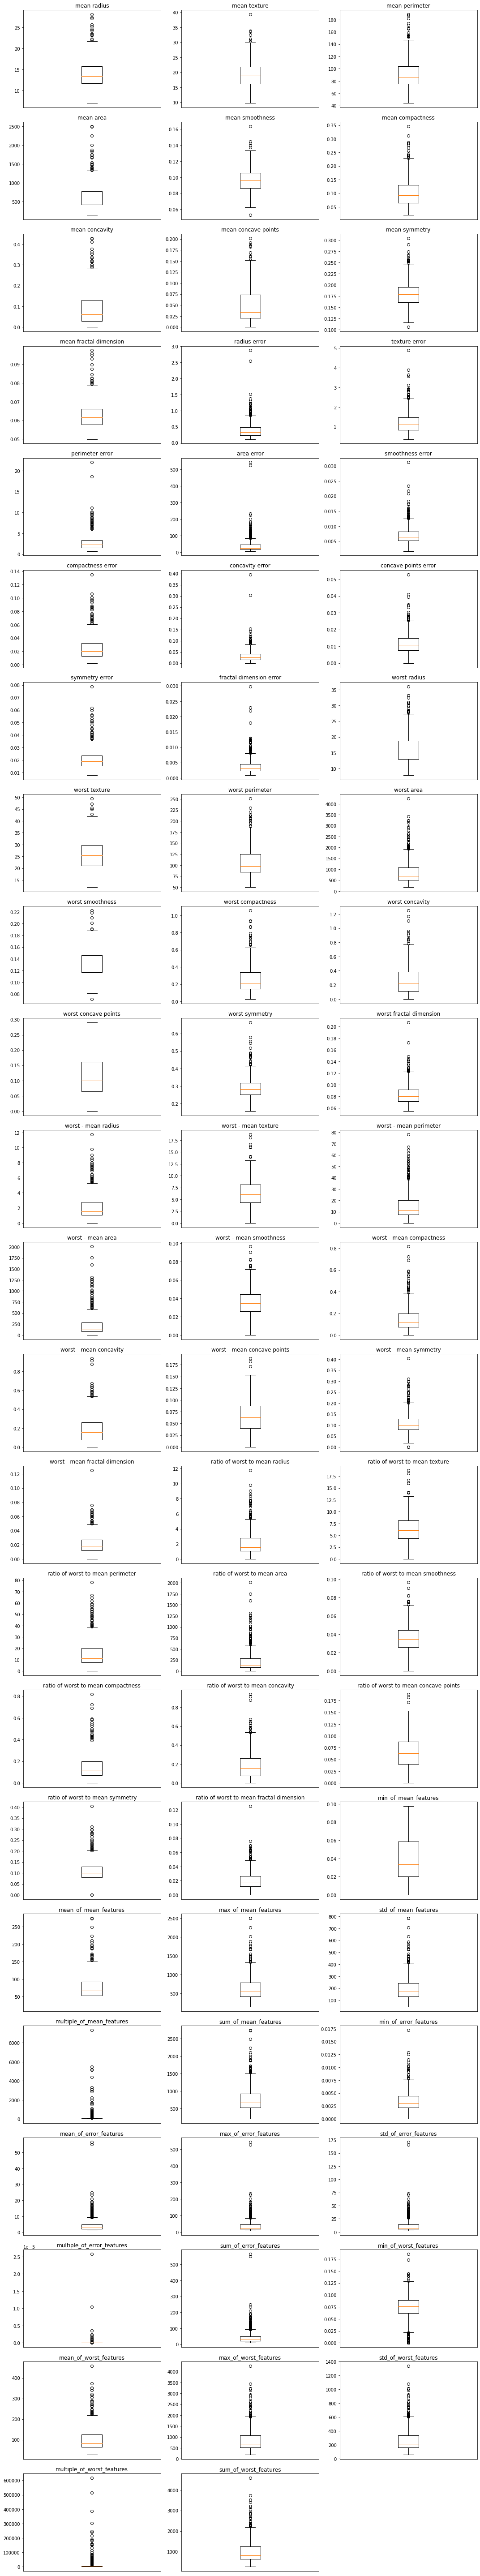

In [19]:
fig = plt.figure(figsize = (15,80))
for index, column_name in enumerate(X.columns):
    ax = fig.add_subplot(23,3,index + 1)
    plt.boxplot(x = X[column_name])
    plt.title(column_name)
    plt.xticks([])
plt.tight_layout()

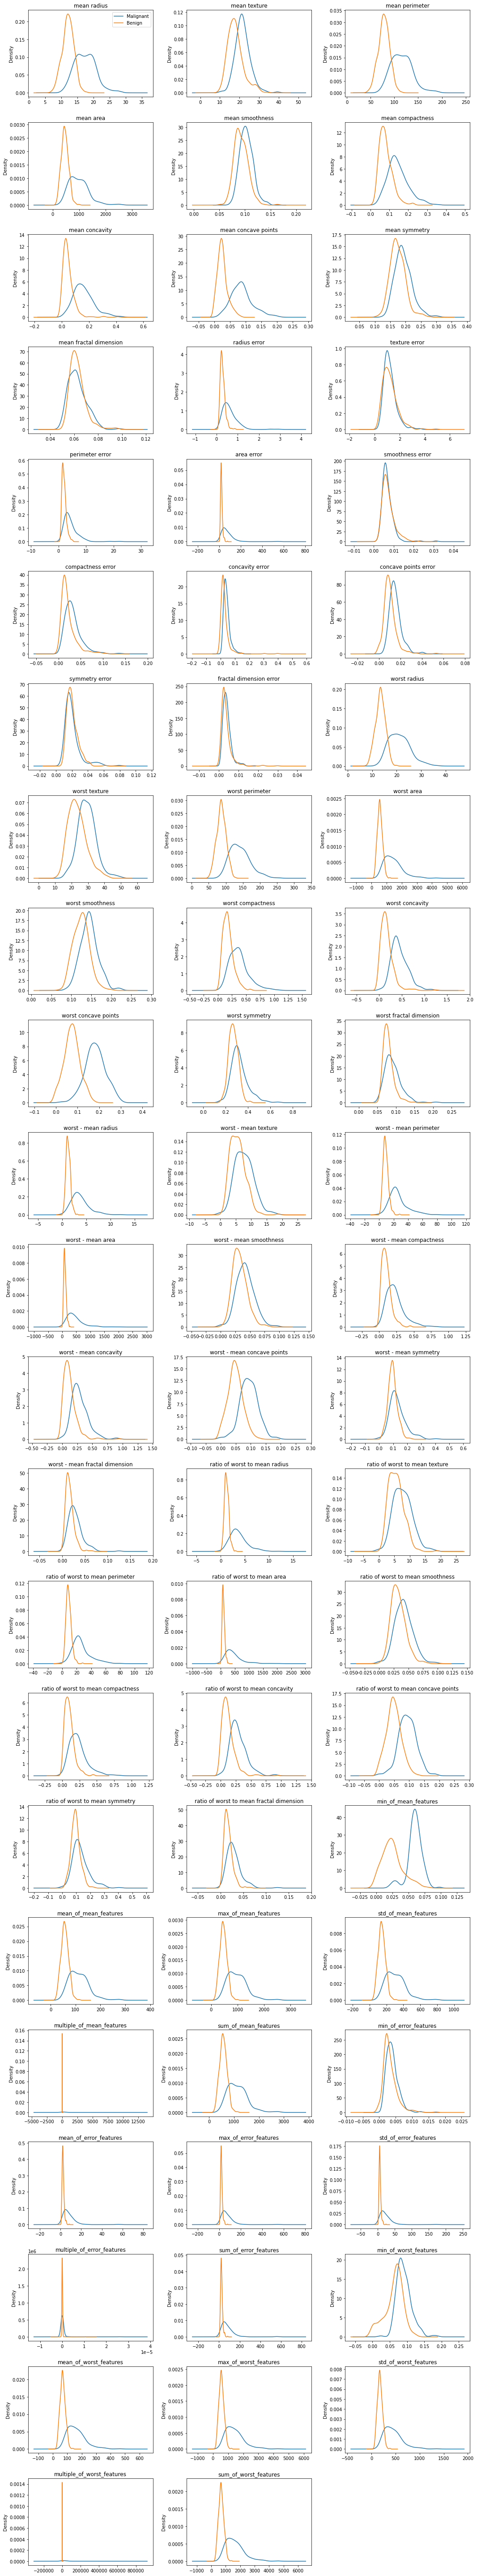

In [20]:
fig = plt.figure(figsize = (15,80))
for index, column_name in enumerate(X.columns):
    ax = fig.add_subplot(23,3,index + 1)
    malignant[column_name].plot.kde(ax = ax, label = 'Malignant')
    benign[column_name].plot.kde(ax = ax, label = 'Benign')
    plt.title(column_name)
    if index == 0:
        plt.legend()
plt.tight_layout()

In [21]:
X[X['area error'] > 300]

mean radius  ...  sum_of_worst_features
212        28.11  ...             2735.04545
461        27.42  ...             4574.45547

[2 rows x 68 columns]

In [22]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [23]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [24]:
#Linear correlations
df.corr()['target'].sort_values()

worst concave points     -0.793566
worst perimeter          -0.782914
mean concave points      -0.776614
worst radius             -0.776454
min_of_mean_features     -0.761568
                            ...   
symmetry error            0.006522
texture error             0.008303
mean fractal dimension    0.012838
smoothness error          0.067016
target                    1.000000
Name: target, Length: 69, dtype: float64

In [25]:
malignant = df[df['target'] == 1]
benign = df[df['target'] == 0]

In [26]:
#create a list to place similar columns together
similar_column_ordered = []
for i in range(10):
    similar_column_ordered.append(X.columns[i])
    similar_column_ordered.append(X.columns[i+10])
    similar_column_ordered.append(X.columns[i+20])

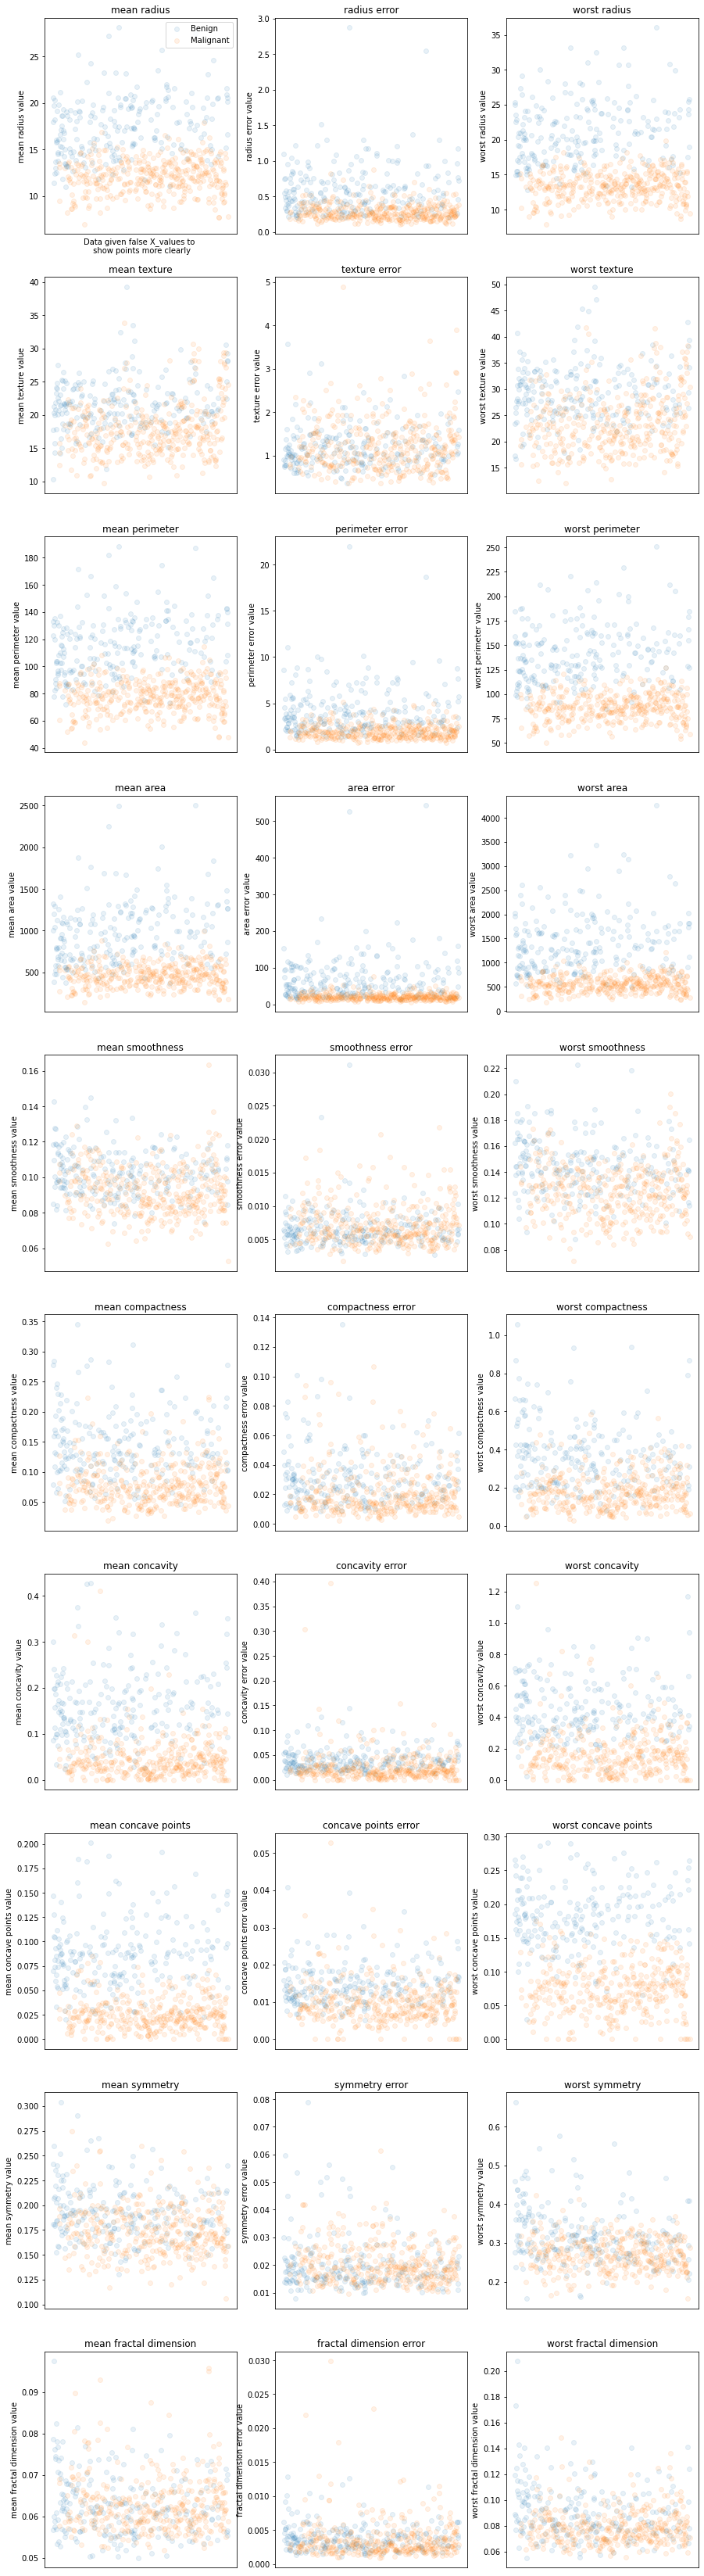

In [27]:
#Print distribution of benign and malignant in original feature columns
fig = plt.figure(figsize = (15,60))
for index, column_name in enumerate(similar_column_ordered):
    ax = fig.add_subplot(10,3,index + 1)
    plt.scatter(x = benign.index, y = benign[column_name], label = 'Benign', alpha = 0.1)
    plt.scatter(x = malignant.index, y = malignant[column_name], label = 'Malignant', alpha = 0.1)
    plt.xticks([])
    plt.ylabel(f"{column_name} value")
    plt.title(f"{column_name}")
    if index == 0:
        plt.legend()
        plt.xlabel(f'Data given false X_values to \n show points more clearly')
        

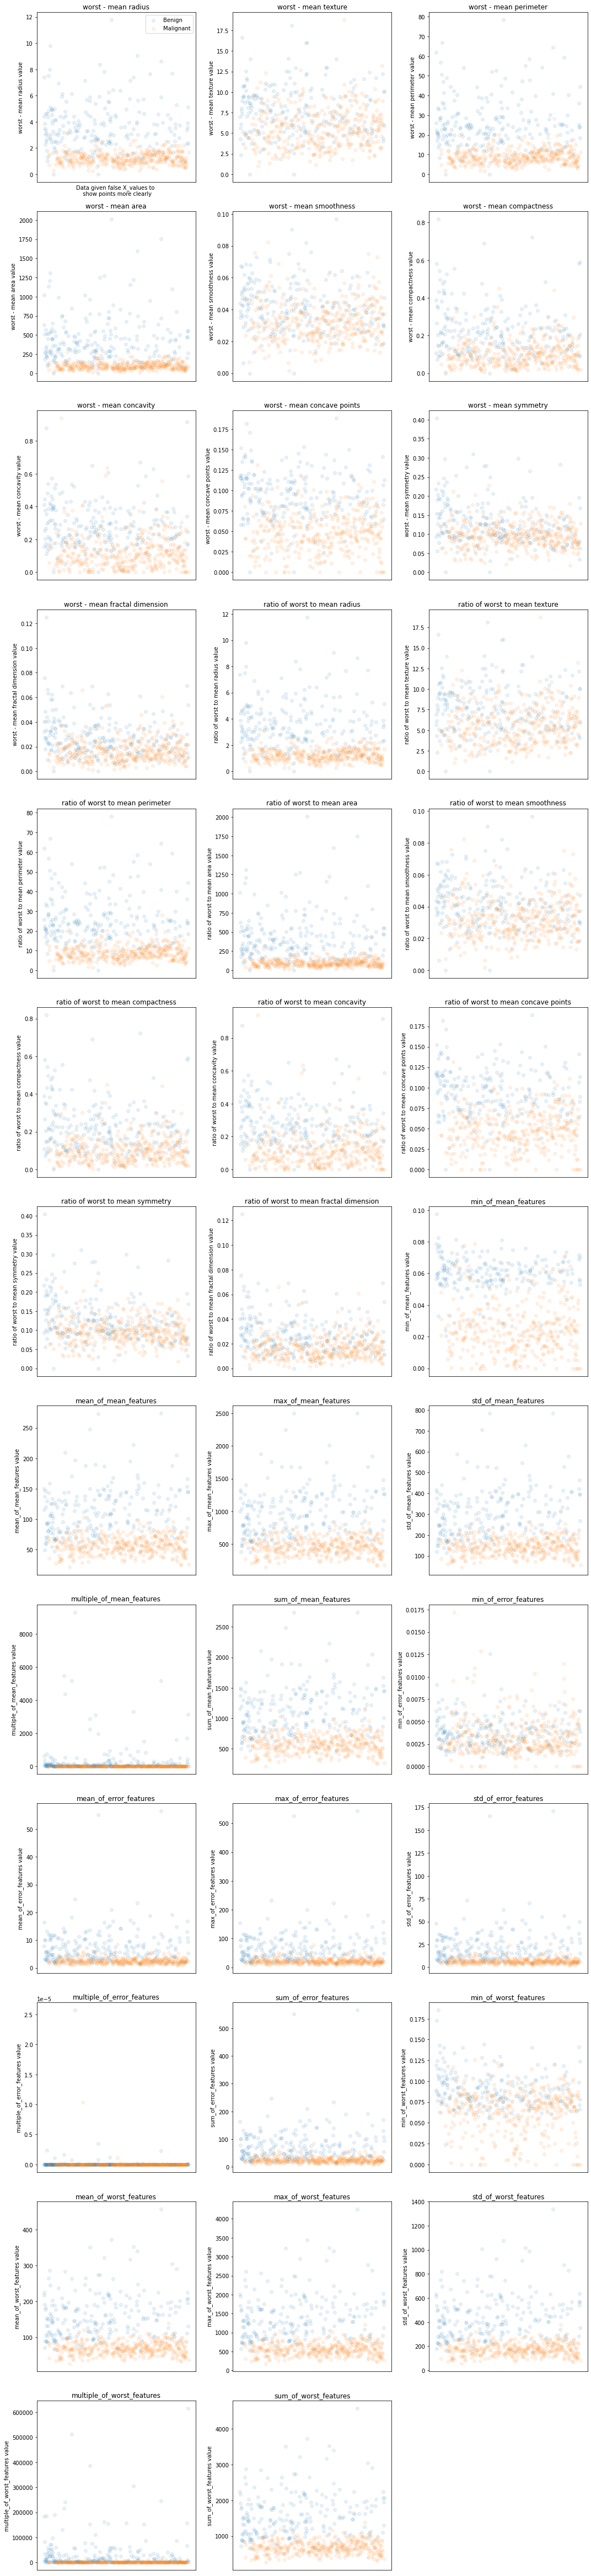

In [28]:
#Print distribution of benign and malignant in new feature columns
fig = plt.figure(figsize = (15,100))
for index, column_name in enumerate(X.columns[30:]):
    ax = fig.add_subplot(20,3,index + 1)
    plt.scatter(x = benign.index, y = benign[column_name], label = 'Benign', alpha = 0.1)
    plt.scatter(x = malignant.index, y = malignant[column_name], label = 'Malignant', alpha = 0.1)
    plt.xticks([])
    plt.ylabel(f"{column_name} value")
    plt.title(f"{column_name}")
    if index == 0:
        plt.legend()
        plt.xlabel(f'Data given false X_values to \n show points more clearly')
plt.tight_layout()

In [29]:
#For comparing 2 variables calculate number of permutations:
n_factorial = np.math.factorial(len(X.columns))
n_minus_r_factorial = np.math.factorial(len(X.columns) - 2)
print(f"We now have {len(X.columns)} columns.")
print(f"For Comparing 2 Variables there are {int(n_factorial/ n_minus_r_factorial)} permutations")

We now have 68 columns.
For Comparing 2 Variables there are 4556 permutations


###### 4556 permutations means there are 4556 unique ways to compare 2 of the 68 variables.

###### We could manually print all comparisons in scatter graphs and visually pick the features that give the best separation

###### A more powerful method is too loop through 30 permutations (as there are 30 feature columns) at a time using a column distance to ensure no repetition of permutations.

###### The first run will compare columns next to each other (1 column distance)

###### The second run will compare columns two away from each other (2 column distance)

###### And so on. Then we can generate a score based on a simple K Nearest Neighbours method. The best separation will have the highest accuracy scores

In [30]:
'''
seen_comparisons = []
two_variable_comparisons = pd.DataFrame({
    'variable_1': [],
    'variable_2': [],
    'accuracy_score': []})
column_length = len(X.columns)
for column_distance in np.arange(1, column_length +1):

    for index, column_name in enumerate(X.columns):
        comparison_index = index + column_distance
        if (comparison_index) >= column_length:
            comparison_index = (comparison_index) - column_length
        KNN_model = KNeighborsClassifier()
        variable_1 = X.columns[index]
        variable_2 = X.columns[comparison_index]
        KNN_model.fit(X[[variable_1, variable_2]], y)
        score = KNN_model.score(X[[variable_1, variable_2]], y)
        
        #Only add combination if its not already been seen.
        if [variable_2, variable_1] not in seen_comparisons:
            seen_comparisons.append([variable_1, variable_2])
            two_variable_comparisons = two_variable_comparisons.append({'variable_1': variable_1,
                                                                        'variable_2': variable_2,
                                                                        'accuracy_score': score},
                                                                       ignore_index = True)
top_30 = two_variable_comparisons.sort_values(by = 'accuracy_score', ascending = False)[:30]
top_30 = top_30.reset_index(drop=True)
'''
#Note the code above takes significant run time.
#For simplicity it was saved as below to github page 
#and will be loaded from there
'''
top_30.to_csv('top_30.csv')
'''

"\ntop_30.to_csv('top_30.csv')\n"

In [31]:
top_30 = pd.read_csv('https://raw.githubusercontent.com/adbandy/data_files/main/top_30.csv', index_col = 0)
top_30

variable_1  ... accuracy_score
0          multiple_of_mean_features  ...       0.961336
1             worst - mean perimeter  ...       0.961336
2   ratio of worst to mean perimeter  ...       0.961336
3          multiple_of_mean_features  ...       0.959578
4         multiple_of_worst_features  ...       0.959578
5                  worst - mean area  ...       0.957821
6        ratio of worst to mean area  ...       0.957821
7              max_of_worst_features  ...       0.957821
8         multiple_of_worst_features  ...       0.957821
9              std_of_worst_features  ...       0.956063
10                        worst area  ...       0.956063
11                 worst - mean area  ...       0.956063
12         multiple_of_mean_features  ...       0.956063
13       ratio of worst to mean area  ...       0.956063
14                   worst perimeter  ...       0.956063
15                      mean texture  ...       0.954306
16                     worst texture  ...       0.954306
17                   worst perimeter  ...       0.954306
18                   worst perimeter  ...       0.954306
19            mean_of_worst_features  ...       0.954306
20                     worst texture  ...       0.954306
21               worst - mean radius  ...       0.952548
22         multiple_of_mean_features  ...       0.952548
23                   worst perimeter  ...       0.952548
24                    mean concavity  ...       0.952548
25                      worst radius  ...       0.952548
26         multiple_of_mean_features  ...       0.952548
27     ratio of worst to mean radius  ...       0.952548
28                    mean concavity  ...       0.952548
29                     worst texture  ...       0.952548

[30 rows x 3 columns]

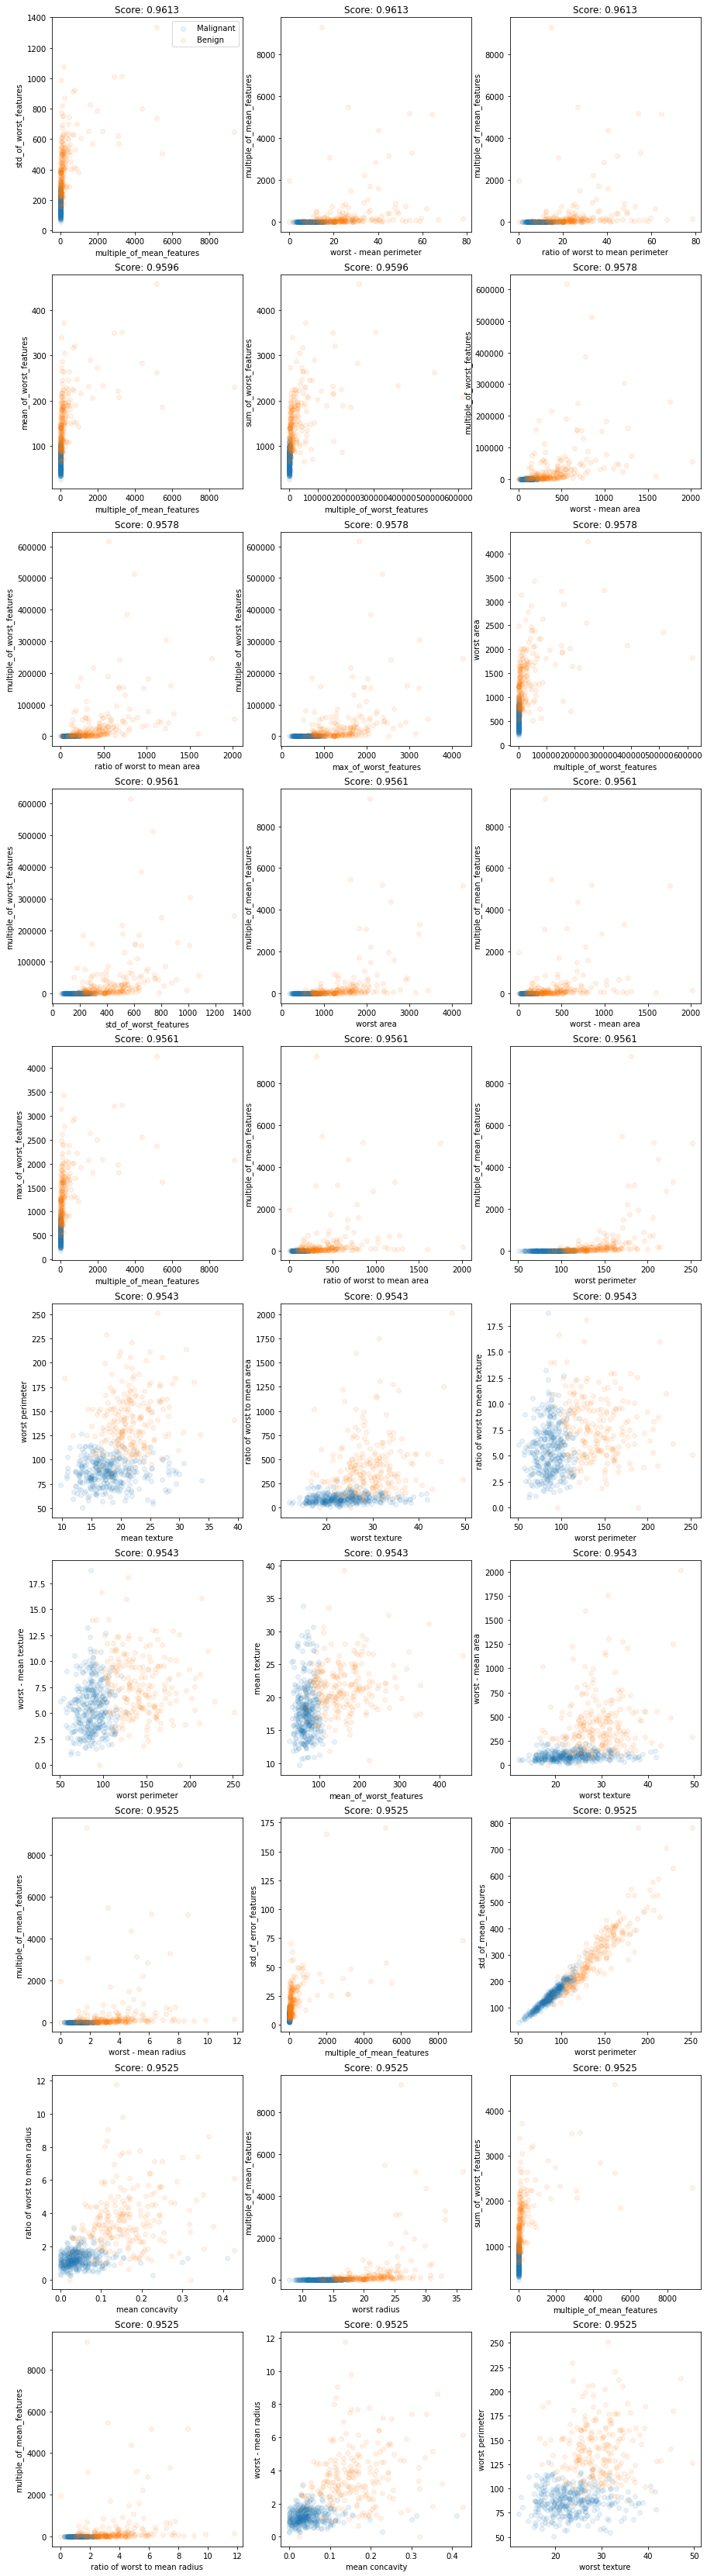

In [32]:
fig = plt.figure(figsize = (15,60))
for index in np.arange(len(top_30)):
    variable_1 = top_30['variable_1'].iloc[index]
    variable_2 = top_30['variable_2'].iloc[index]
    score = top_30['accuracy_score'].iloc[index]
    
    ax = fig.add_subplot(10,3,index + 1)
    plt.scatter(x = malignant[variable_1], y = malignant[variable_2], label = 'Malignant', alpha = 0.1)
    plt.scatter(x = benign[variable_1], y = benign[variable_2], label = 'Benign', alpha = 0.1)
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)
    plt.title(f"Score: {score:.4f}")
    if index == 0:
        plt.legend()


Clearly our newly created features will have value in separation of clusters.

# Part II Application: Clustering
## Train Test Split

First we will split the data into a training set and testing set in an (80:20 ratio)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"The % proportions of classes in the splits are: \
\ny_train :\n{round(y_train.value_counts(normalize=True)*100,2)}\n\ny_test:\n{round(y_test.value_counts(normalize=True)*100,2)}")

The % proportions of classes in the splits are: 
y_train :
1    62.64
0    37.36
Name: target, dtype: float64

y_test:
1    63.16
0    36.84
Name: target, dtype: float64


## Normalisation

We must use X_train to fit a scaler. Then rescale the X_train and X_test. This is done to give each column equal importance in the modelling. 


In [34]:
columns = X_train.columns
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)


#Display a scaled preview. 
X_test.head()

mean radius  mean texture  ...  multiple_of_worst_features  sum_of_worst_features
0     0.131853     -1.222897  ...                   -0.265760              -0.145102
1    -0.288741     -0.157999  ...                   -0.057209              -0.226482
2    -0.349617     -0.758711  ...                   -0.282824              -0.538726
3     1.133531     -0.176203  ...                   -0.211151               0.858963
4     0.253604      2.379096  ...                   -0.286328               0.070392

[5 rows x 68 columns]

## Dimensionallity Reduction - Using PCA

<BarContainer object of 68 artists>

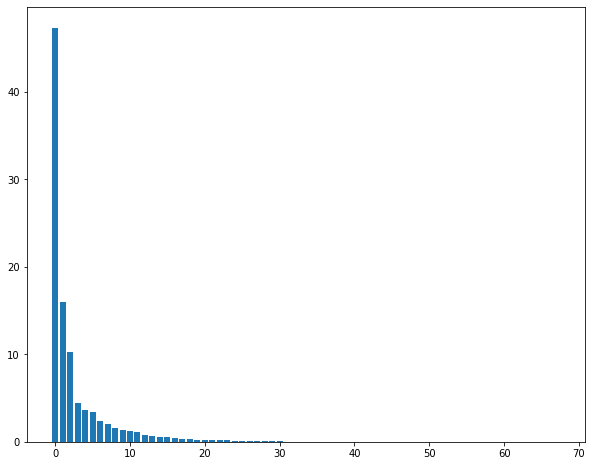

In [35]:
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pca_var_perc = pca.explained_variance_ratio_ * 100
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
ax.bar(x=[i for i in range(len(pca_var_perc))],height=pca_var_perc)
# pca_var_perc[0]+pca_var_perc[1]+pca_var_perc[2]+pca_var_perc[3]+pca_var_perc[4]+pca_var_perc[5]

In [36]:
pd.DataFrame(pca.explained_variance_ratio_).cumsum().head(15)

0
0   0.473403
1   0.633282
2   0.735555
3   0.779996
4   0.815929
5   0.849639
6   0.873803
7   0.893710
8   0.909671
9   0.923128
10  0.935526
11  0.946953
12  0.955294
13  0.961852
14  0.967752

In [37]:
pca_var_perc_df = pd.DataFrame(X_train_pca)
pca_var_perc_df['target'] = y_train.values
pca_var_perc_df.head()

0         1         2  ...            66            67  target
0  4.096276 -0.106858 -0.791704  ...  4.048693e-16 -1.641760e-15       0
1  4.532031  4.058701  2.502056  ...  4.351569e-16 -1.261222e-15       0
2 -7.720616  1.128348 -0.410634  ...  2.707754e-17  1.353126e-15       1
3 -2.918758 -1.098620  0.530574  ...  9.153653e-17  9.655898e-16       1
4 -5.694911  3.667797  0.653513  ...  2.192557e-16  7.054210e-16       1

[5 rows x 69 columns]

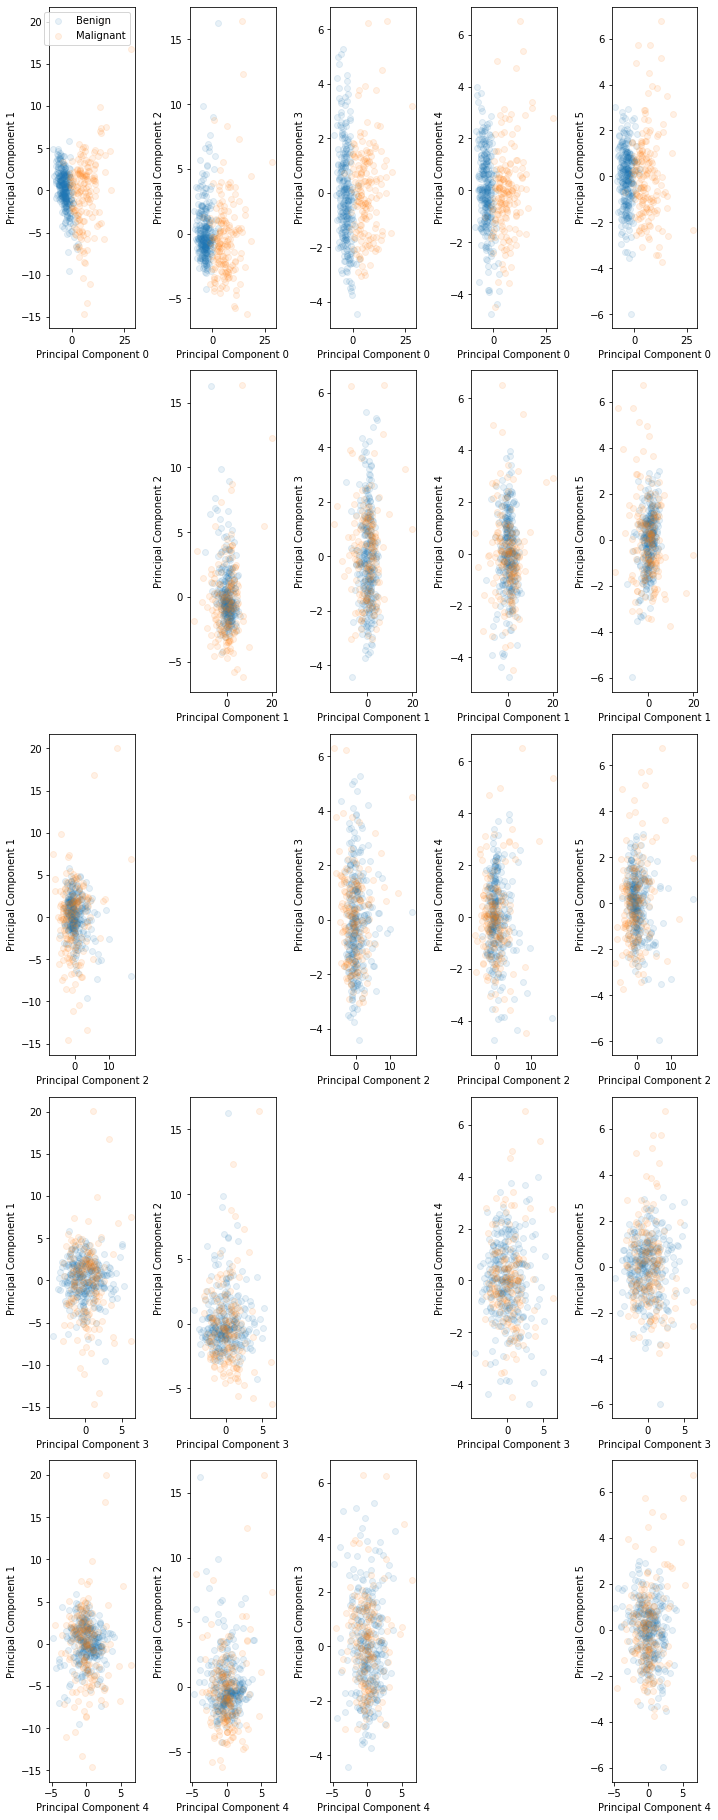

In [38]:
sub_df_benign = pca_var_perc_df[pca_var_perc_df['target'] == 1] 
sub_df_malignant = pca_var_perc_df[pca_var_perc_df['target'] == 0]

fig = plt.figure(figsize = (10,30))
for i in range(5):
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 1)
      plt.xlabel(f"Principal Component 0")
      plt.ylabel(f"Principal Component 1")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    elif i == (j+1):
      pass
    else:
      fig.add_subplot(6,5, ((i*5)+(j+1)))
      plt.xlabel(f"Principal Component {i}")
      plt.ylabel(f"Principal Component {j+1}")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')

plt.tight_layout()

In [39]:
k_pca = KernelPCA()
k_pca.fit(X_train)
X_train_k_pca = k_pca.transform(X_train)
X_test_k_pca = k_pca.transform(X_test)

In [40]:
k_pca_var_perc_df = pd.DataFrame(X_train_k_pca)
k_pca_var_perc_df['target'] = y_train.values
k_pca_var_perc_df.head()

0         1         2         3  ...        36        37        38  target
0  4.096276 -0.106858 -0.791704 -1.593036  ...  0.000084  0.000009  0.000010       0
1  4.532031  4.058701  2.502056 -2.681104  ...  0.000736 -0.000270  0.000120       0
2 -7.720616  1.128348 -0.410634  0.764312  ... -0.000210  0.000154 -0.000117       1
3 -2.918758 -1.098620  0.530574 -2.247595  ... -0.000117 -0.000159 -0.000065       1
4 -5.694911  3.667797  0.653513 -1.477703  ... -0.000164  0.000044 -0.000022       1

[5 rows x 40 columns]

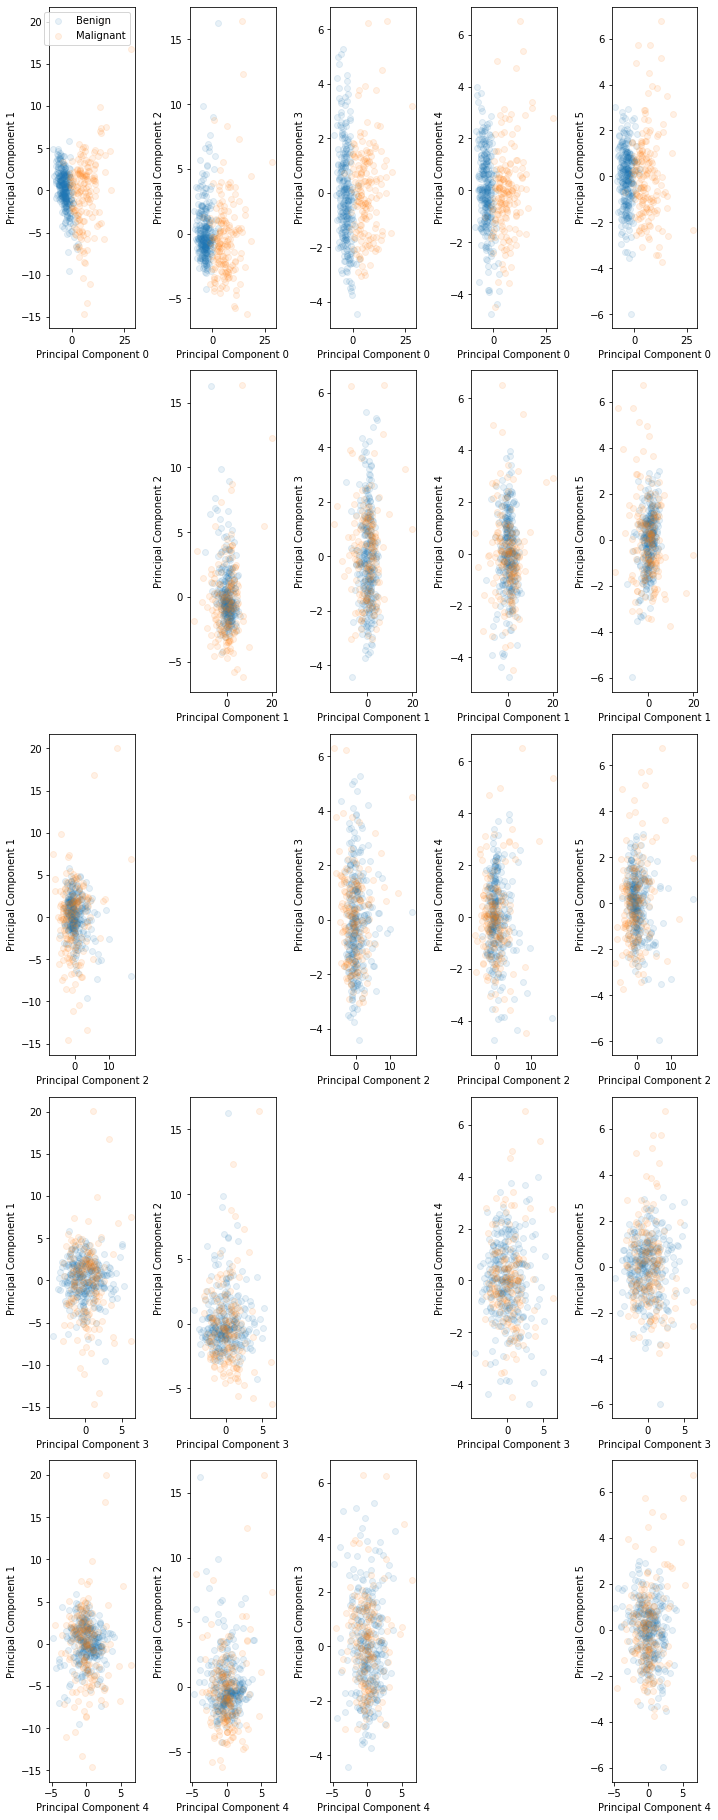

In [41]:
sub_df_benign = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 1] 
sub_df_malignant = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 0]

fig = plt.figure(figsize = (10,30))
for i in range(5):
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 1)
      plt.xlabel(f"Principal Component 0")
      plt.ylabel(f"Principal Component 1")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    elif i == (j+1):
      pass
    else:
      fig.add_subplot(6,5, ((i*5)+(j+1)))
      plt.xlabel(f"Principal Component {i}")
      plt.ylabel(f"Principal Component {j+1}")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')

plt.tight_layout()

### Comparing PCA with K_PCA

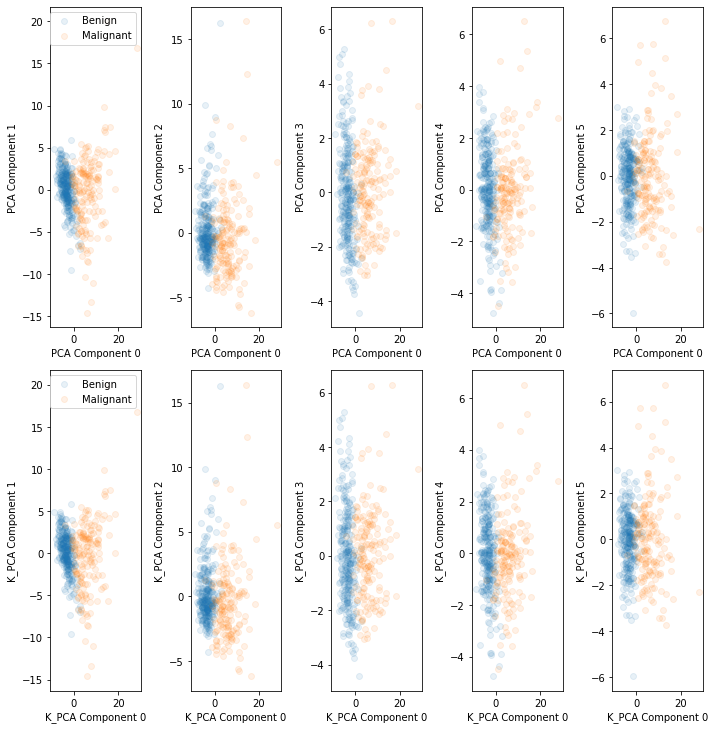

In [42]:
sub_df_benign_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 1] 
sub_df_malignant_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 0]

sub_df_benign_k_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 1] 
sub_df_malignant_k_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 0]

fig = plt.figure(figsize = (10,30))

for i in [0]:
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 1)
      plt.xlabel(f"PCA Component 0")
      plt.ylabel(f"PCA Component 1")

      plt.scatter(sub_df_benign_pca[sub_df_benign_pca.columns[i]], sub_df_benign_pca[sub_df_benign_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_pca[sub_df_malignant_pca.columns[i]], sub_df_malignant_pca[sub_df_malignant_pca.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    else:
      fig.add_subplot(6,5, ((i*5)+(j+1)))
      plt.xlabel(f"PCA Component {i}")
      plt.ylabel(f"PCA Component {j+1}")

      plt.scatter(sub_df_benign_pca[sub_df_benign_pca.columns[i]], sub_df_benign_pca[sub_df_benign_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_pca[sub_df_malignant_pca.columns[i]], sub_df_malignant_pca[sub_df_malignant_pca.columns[j+1]], alpha = 0.1, label = 'Malignant')     


for i in [0]:
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 6)
      plt.xlabel(f"K_PCA Component 0")
      plt.ylabel(f"K_PCA Component 1")

      plt.scatter(sub_df_benign_k_pca[sub_df_benign_k_pca.columns[i]], sub_df_benign_k_pca[sub_df_benign_k_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_k_pca[sub_df_malignant_k_pca.columns[i]], sub_df_malignant_k_pca[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    else:
      fig.add_subplot(6,5, (5+j+1))
      plt.xlabel(f"K_PCA Component {i}")
      plt.ylabel(f"K_PCA Component {j+1}")

      plt.scatter(sub_df_benign_k_pca[sub_df_benign_k_pca.columns[i]], sub_df_benign_k_pca[sub_df_benign_k_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_k_pca[sub_df_malignant_k_pca.columns[i]], sub_df_malignant_k_pca[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')

plt.tight_layout()

No discernable differences between PCA and k_PCA

### Spectral Clustering
In general this technique is most suitable for when the data does not form seperate spherical like clusters with little overlap.
For instance it works well for sphere within a hollow sphere or double helix style structure.

Whether this method is applicable is difficult for multi-dimensional space, but from seeing our top_30 comparisons (of one variable vs another) we can say some combinations are potentially spherical-like and separable.

First let us review a simplistic model. And test it

In [43]:
spectral_cluster_model = SpectralClustering(n_clusters = 2, random_state = 1, n_init = 10, affinity = 'nearest_neighbors', assign_labels= 'kmeans')
spectral_cluster_model.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=1)

In [44]:
clustering_performance_evaluation(X, spectral_cluster_model.labels_, print_output = True)

Silhouette Score: 0.764        
Calinski-Harabasz Score: 275.141        
David-Bouldin Score: 0.843


High Score is desirable for Calinski-Harabasz Score.
Low score is desirable for Silhouette Score & David-Bouldin Score

In [ ]:
classification_using_clustering_performance_evaluation(y, spectral_cluster_model.labels_, print_output = True, classification= False)

Homogeneity Score: 0.299        
Completeness Score: 0.435        
V_measure Score: 0.354        
Accuracy Score: 0.796        
Balanced Accuracy Score: 0.726        
F1 Score: 1.000        
Adjusted_rand_score : 0.331


In all of these classifications scores, higher values are better.

In [ ]:
spectral_clustering_hyperparameter_tuning_df = pd.DataFrame({'n_init': [],
                                                             'eigen_solver': [],
                                                             'n_neigbors': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})

In [ ]:
for n_init in [10,100,1000]:
    for eigen_solver in ['arpack', 'lobpcg']:
        for n_neigbors in [1,10,100]:
            spectral_cluster_model= SpectralClustering(n_clusters = 2,
                                                       random_state = 1,
                                                       affinity = 'nearest_neighbors',
                                                       assign_labels= 'kmeans',
                                                       n_init = n_init,
                                                      eigen_solver= eigen_solver,
                                                      n_neighbors= n_neigbors)
            spectral_cluster_model.fit(X)
            h,c,v,a,b,f1,ars = classification_using_clustering_performance_evaluation(y, spectral_cluster_model.labels_ , classification= False)
            ss, chs, dbs =  clustering_performance_evaluation(X, spectral_cluster_model.labels_)
            spectral_clustering_hyperparameter_tuning_df = \
                spectral_clustering_hyperparameter_tuning_df.append({'n_init': n_init,
                                                                     'eigen_solver': eigen_solver,
                                                                     'n_neigbors': n_neigbors,
                                                                     'Homogeneity Score': h,
                                                                     'Completeness Score': c,
                                                                     'V_measure Score': v,
                                                                     'Accuracy Score': a,
                                                                     'Balanced Accuracy Score': b,
                                                                     'F1 Score': f1,
                                                                     'Adjusted_rand_score': ars,
                                                                     'Silhouette Score': ss,
                                                                     'Calinski-Harabasz Score': chs,
                                                                     'David-Bouldin Score': dbs}, ignore_index = True)                                                             

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expecte

KeyboardInterrupt: ignored

In [ ]:
spectral_clustering_hyperparameter_tuning_df.sort_values(by = 'Adjusted_rand_score', ascending = False)

Higher n_neigbhours is most influential here. Will experiment with high neighbour count. Other hyperparameter tuning has had little effect.

In [ ]:
spectral_clustering_hyperparameter_tuning_n_neighbours_df = pd.DataFrame({'n_init': [],
                                                             'eigen_solver': [],
                                                             'n_neigbors': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})

In [ ]:
for n_init in [10]:
    for eigen_solver in ['arpack']:
        
        for n_neigbors in list(np.arange(50,550, 10)):
            spectral_cluster_model= SpectralClustering(n_clusters = 2,
                                                       random_state = 1,
                                                       affinity = 'nearest_neighbors',
                                                       assign_labels= 'kmeans',
                                                       n_init = n_init,
                                                      eigen_solver= eigen_solver,
                                                      n_neighbors= n_neigbors)
            spectral_cluster_model.fit(X)
            h,c,v,a,b,f1,ars = classification_using_clustering_performance_evaluation(y, spectral_cluster_model.labels_, classification= False)
            ss, chs, dbs =  clustering_performance_evaluation(X, spectral_cluster_model.labels_)
            spectral_clustering_hyperparameter_tuning_n_neighbours_df = \
                spectral_clustering_hyperparameter_tuning_n_neighbours_df.append({'n_init': n_init,
                                                                     'eigen_solver': eigen_solver,
                                                                     'n_neigbors': n_neigbors,
                                                                     'Homogeneity Score': h,
                                                                     'Completeness Score': c,
                                                                     'V_measure Score': v,
                                                                     'Accuracy Score': a,
                                                                     'Balanced Accuracy Score': b,
                                                                     'F1 Score': f1,
                                                                     'Adjusted_rand_score': ars,
                                                                     'Silhouette Score': ss,
                                                                     'Calinski-Harabasz Score': chs,
                                                                     'David-Bouldin Score': dbs}, ignore_index = True)                                                             

In [ ]:
spectral_clustering_hyperparameter_tuning_n_neighbours_df = spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by = 'Adjusted_rand_score', ascending = False)
spectral_clustering_hyperparameter_tuning_n_neighbours_df[['Homogeneity Score',
       'Completeness Score', 'V_measure Score', 'Accuracy Score',
       'Balanced Accuracy Score', 'F1 Score', 'Adjusted_rand_score']] = spectral_clustering_hyperparameter_tuning_n_neighbours_df[['Homogeneity Score',
       'Completeness Score', 'V_measure Score', 'Accuracy Score',
       'Balanced Accuracy Score', 'F1 Score', 'Adjusted_rand_score']].apply(lambda x: round(x,3))
spectral_clustering_hyperparameter_tuning_n_neighbours_df.head(5)

n_init eigen_solver  ...  Calinski-Harabasz Score  David-Bouldin Score
29    10.0       arpack  ...                82.208020             1.114063
30    10.0       arpack  ...                87.746666             1.098273
31    10.0       arpack  ...                95.357303             1.077820
4     10.0       arpack  ...                99.566599             1.066769
32    10.0       arpack  ...               101.219546             1.062829

[5 rows x 13 columns]

In [ ]:
spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by = 'Adjusted_rand_score')

n_init eigen_solver  ...  Calinski-Harabasz Score  David-Bouldin Score
49    10.0       arpack  ...               788.417806             0.580649
48    10.0       arpack  ...               625.697503             0.660411
47    10.0       arpack  ...               526.766471             0.720047
46    10.0       arpack  ...               447.561267             0.761157
45    10.0       arpack  ...               386.164895             0.790210
44    10.0       arpack  ...               338.237879             0.811351
43    10.0       arpack  ...               299.009109             0.829861
42    10.0       arpack  ...               265.341153             0.849687
41    10.0       arpack  ...               238.776437             0.869220
40    10.0       arpack  ...               211.072519             0.892321
39    10.0       arpack  ...               191.679382             0.911425
38    10.0       arpack  ...               173.264359             0.932962
37    10.0       arpack  ...               155.242815             0.958876
23    10.0       arpack  ...                60.066274             1.185760
19    10.0       arpack  ...                60.104327             1.185402
18    10.0       arpack  ...                60.104327             1.185402
24    10.0       arpack  ...                60.518667             1.184153
36    10.0       arpack  ...               142.727768             0.978816
17    10.0       arpack  ...                61.031593             1.182039
20    10.0       arpack  ...                61.021379             1.182123
21    10.0       arpack  ...                61.002944             1.182309
22    10.0       arpack  ...                61.001472             1.182310
15    10.0       arpack  ...                62.445101             1.177057
16    10.0       arpack  ...                62.445101             1.177057
35    10.0       arpack  ...               129.275211             1.002463
25    10.0       arpack  ...                64.322329             1.171030
0     10.0       arpack  ...               122.657646             1.015010
11    10.0       arpack  ...                65.401309             1.166956
26    10.0       arpack  ...                66.885558             1.162153
12    10.0       arpack  ...                64.895271             1.168703
13    10.0       arpack  ...                64.895271             1.168703
14    10.0       arpack  ...                64.895271             1.168703
34    10.0       arpack  ...               119.373624             1.021662
1     10.0       arpack  ...               117.362055             1.025818
10    10.0       arpack  ...                67.991723             1.158319
2     10.0       arpack  ...               113.315671             1.034594
3     10.0       arpack  ...               107.524035             1.047990
27    10.0       arpack  ...                70.088184             1.151534
7     10.0       arpack  ...                79.065763             1.123032
9     10.0       arpack  ...                73.573550             1.139952
8     10.0       arpack  ...                75.957013             1.132471
33    10.0       arpack  ...               110.282528             1.041541
6     10.0       arpack  ...                85.746450             1.103494
5     10.0       arpack  ...                92.335011             1.085426
28    10.0       arpack  ...                75.261789             1.134966
32    10.0       arpack  ...               101.219546             1.062829
4     10.0       arpack  ...                99.566599             1.066769
31    10.0       arpack  ...                95.357303             1.077820
30    10.0       arpack  ...                87.746666             1.098273
29    10.0       arpack  ...                82.208020             1.114063

[50 rows x 13 columns]

In [ ]:
#Sort by n_neighbours for plotting purposes
spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted = spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'n_neigbors')

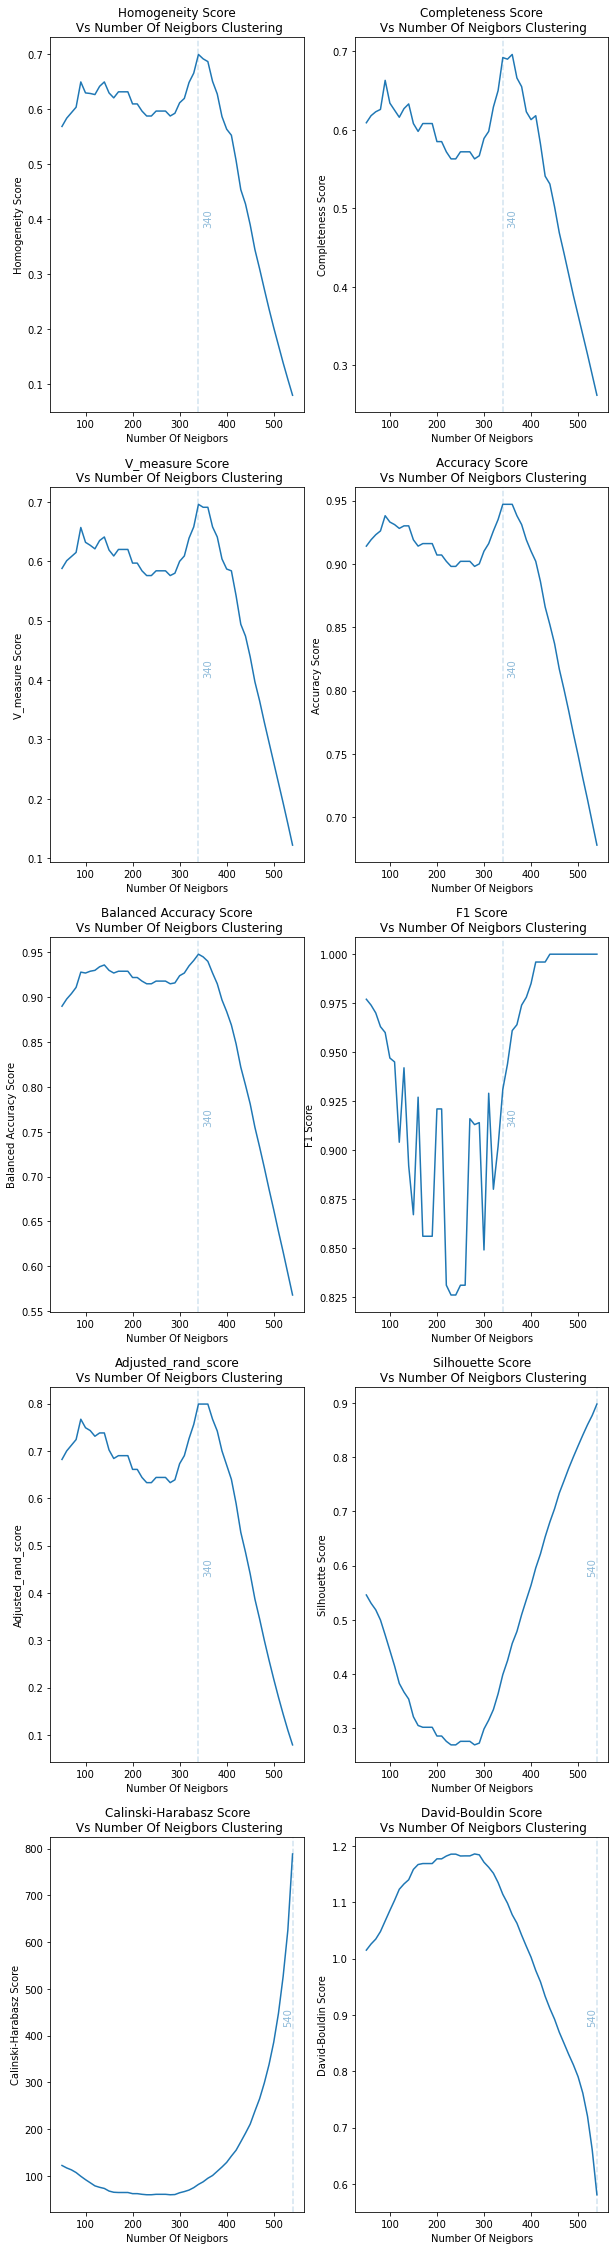

In [ ]:
#plot the various scores
fig = plt.figure(figsize = (10,40))
for i,j in zip(range(1,11), ['Homogeneity Score',
       'Completeness Score', 'V_measure Score', 'Accuracy Score',
       'Balanced Accuracy Score', 'F1 Score', 'Adjusted_rand_score',
       'Silhouette Score', 'Calinski-Harabasz Score', 'David-Bouldin Score']):
    fig.add_subplot(5,2,i)
    plt.plot(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted['n_neigbors'],
            spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])
    plt.title(f"{j}\n Vs Number Of Neigbors Clustering")
    plt.xlabel(f"Number Of Neigbors")
    plt.ylabel(f"{j}")
    if i <= 7:
        plt.axvline(340, linestyle = 'dashed', alpha = 0.2)
        y_value_for_text = ((np.max(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j]) - np.min(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])) / 2) + np.min(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])
        plt.text(350,y_value_for_text, s='340', rotation = 90, c= '#1f77b4', alpha = 0.5)
    if i >7:
        plt.axvline(540, linestyle = 'dashed', alpha = 0.2)
        y_value_for_text = ((np.max(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j]) - np.min(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])) / 2) + np.min(spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])
        plt.text(520,y_value_for_text, s='540', rotation = 90, c= '#1f77b4', alpha = 0.5)


Best classification metrics are given at 340 Neighbours. 

In [ ]:
best_score_ss = spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'Silhouette Score', ascending = False).iloc[0]['n_neigbors']
best_score_chs = spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'Calinski-Harabasz Score', ascending = False).iloc[0]['n_neigbors']
best_score_dbs = spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'David-Bouldin Score', ascending = True).iloc[0]['n_neigbors']

print(f"N_neigbors that gave the best clustering metrics: \
      \nFor Silhouette Score : {int(best_score_ss)} \
      \nFor Calinski-Harabasz Score : {int(best_score_chs)} \
      \nFor David-Bouldin Score : {int(best_score_dbs)}")

N_neigbors that gave the best clustering metrics:       
For Silhouette Score : 540       
For Calinski-Harabasz Score : 540       
For David-Bouldin Score : 540


### Next lets compare these values with those obtained using the PCA reduced dimensionality data

In [45]:
X_pca = pca.transform(X)
X_pca[:,:6].shape

(569, 6)

In [46]:
pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df = pd.DataFrame({'n_init': [],
                                                             'eigen_solver': [],
                                                             'n_neigbors': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})

In [47]:
for n_init in [10]:
    for eigen_solver in ['arpack']:
        
        for n_neigbors in list(np.arange(50,550, 10)):
            pca_spectral_cluster_model= SpectralClustering(n_clusters = 2,
                                                       random_state = 1,
                                                       affinity = 'nearest_neighbors',
                                                       assign_labels= 'kmeans',
                                                       n_init = n_init,
                                                      eigen_solver= eigen_solver,
                                                      n_neighbors= n_neigbors)
            pca_spectral_cluster_model.fit(X_pca[:,:6])
            h,c,v,a,b,f1,ars = classification_using_clustering_performance_evaluation(y, pca_spectral_cluster_model.labels_, classification= False)
            ss, chs, dbs =  clustering_performance_evaluation(X, pca_spectral_cluster_model.labels_)
            pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df = \
                pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df.append({'n_init': n_init,
                                                                     'eigen_solver': eigen_solver,
                                                                     'n_neigbors': n_neigbors,
                                                                     'Homogeneity Score': h,
                                                                     'Completeness Score': c,
                                                                     'V_measure Score': v,
                                                                     'Accuracy Score': a,
                                                                     'Balanced Accuracy Score': b,
                                                                     'F1 Score': f1,
                                                                     'Adjusted_rand_score': ars,
                                                                     'Silhouette Score': ss,
                                                                     'Calinski-Harabasz Score': chs,
                                                                     'David-Bouldin Score': dbs}, ignore_index = True)

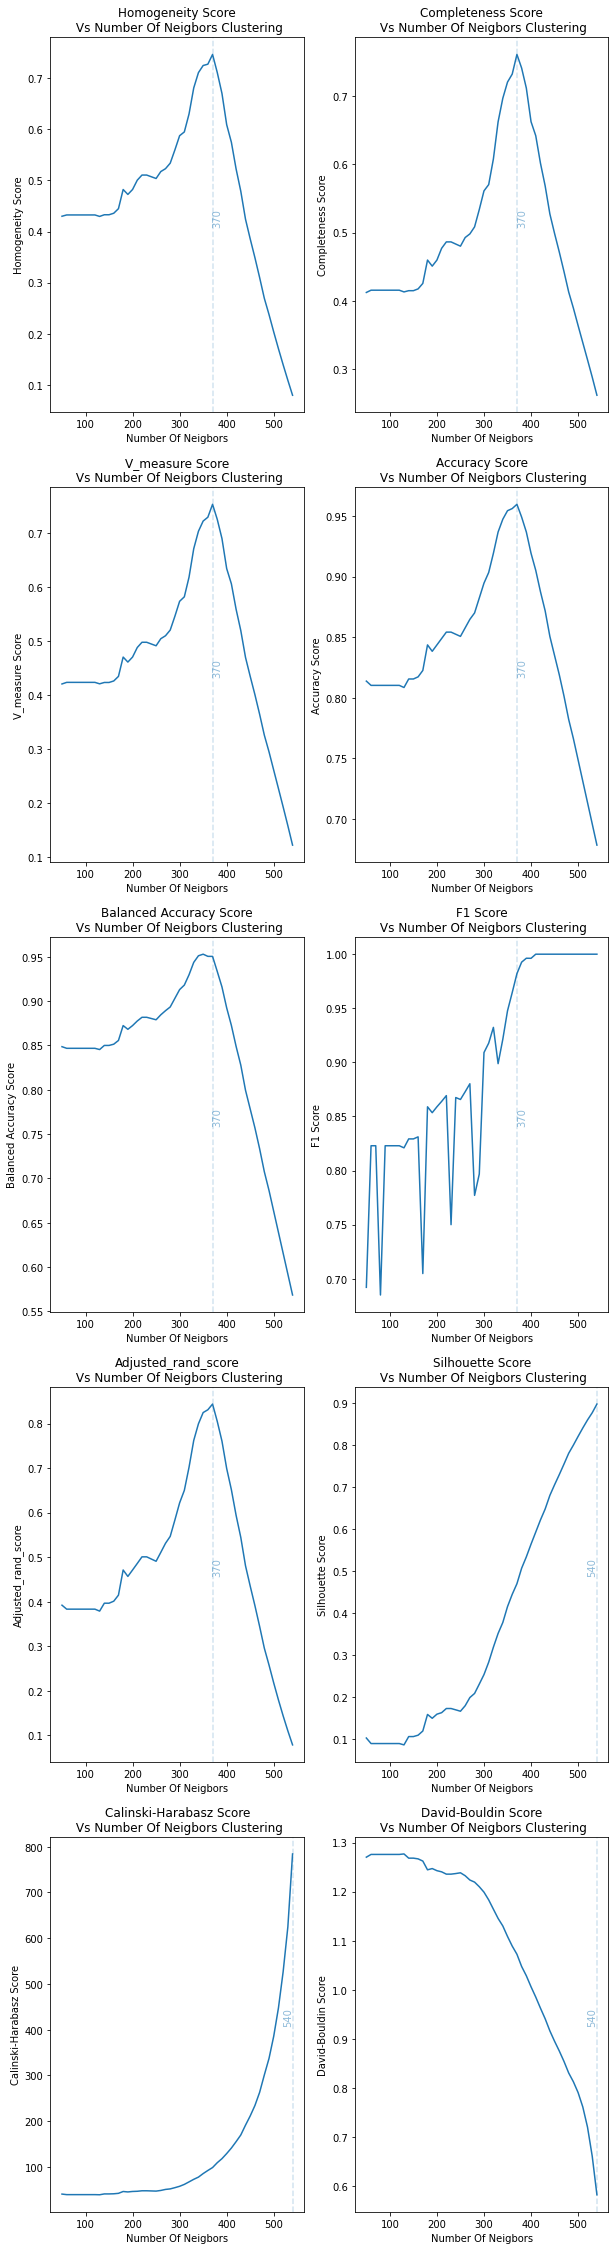

In [48]:
pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted = pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'n_neigbors')
fig = plt.figure(figsize = (10,40))
for i,j in zip(range(1,11), ['Homogeneity Score',
       'Completeness Score', 'V_measure Score', 'Accuracy Score',
       'Balanced Accuracy Score', 'F1 Score', 'Adjusted_rand_score',
       'Silhouette Score', 'Calinski-Harabasz Score', 'David-Bouldin Score']):
    fig.add_subplot(5,2,i)
    plt.plot(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted['n_neigbors'],
            pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])
    plt.title(f"{j}\n Vs Number Of Neigbors Clustering")
    plt.xlabel(f"Number Of Neigbors")
    plt.ylabel(f"{j}")
    if i <= 7:
        plt.axvline(370, linestyle = 'dashed', alpha = 0.2)
        y_value_for_text = ((np.max(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j]) - np.min(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])) / 2) + np.min(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])
        plt.text(370,y_value_for_text, s='370', rotation = 90, c= '#1f77b4', alpha = 0.5)
    if i >7:
        plt.axvline(540, linestyle = 'dashed', alpha = 0.2)
        y_value_for_text = ((np.max(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j]) - np.min(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])) / 2) + np.min(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df_sorted[j])
        plt.text(520,y_value_for_text, s='540', rotation = 90, c= '#1f77b4', alpha = 0.5)

In [49]:
best_score_ss = pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'Silhouette Score', ascending = False).iloc[0]['n_neigbors']
best_score_chs = pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'Calinski-Harabasz Score', ascending = False).iloc[0]['n_neigbors']
best_score_dbs = pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by= 'David-Bouldin Score', ascending = True).iloc[0]['n_neigbors']

print(f"N_neigbors that gave the best clustering metrics: \
      \nFor Silhouette Score : {int(best_score_ss)} \
      \nFor Calinski-Harabasz Score : {int(best_score_chs)} \
      \nFor David-Bouldin Score : {int(best_score_dbs)}")

N_neigbors that gave the best clustering metrics:       
For Silhouette Score : 540       
For Calinski-Harabasz Score : 540       
For David-Bouldin Score : 540


Comparing the Spectral Clustering and PCA- Spectral Clustering:

In [51]:
spectral_comparisons = pd.concat([pd.DataFrame(spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by = 'Adjusted_rand_score',ascending = False).iloc[0]),
          pd.DataFrame(pca_spectral_clustering_hyperparameter_tuning_n_neighbours_df.sort_values(by = 'Adjusted_rand_score',ascending = False).iloc[0])], axis = 1)
spectral_comparisons.columns = ['Spectral Results', 'PCA Spectral Results'] 
spectral_comparisons

NameError: ignored

PCA Spectral Clustering is giving better results in terms of the classification and in terms of clustering metrics.

### Agglomerative Clustering

Lets see some base scores before hyper parameter tuning

In [ ]:
agglomerative_cluster_model = AgglomerativeClustering(n_clusters = 2)
agglomerative_cluster_model.fit(X)
clustering_performance_evaluation
classification_using_clustering_performance_evaluation(y, agglomerative_cluster_model.labels_, print_output = True, classification= False)
clustering_performance_evaluation(X, agglomerative_cluster_model.labels_, print_output = True)

In [ ]:
agglomerative_cluster_hyperparameter_tuning_df = pd.DataFrame({'affinity': [],
                                                             'linkage': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})
for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    for linkage in ['ward', 'average', 'complete', 'single']:
        #ward only works with euclidean so pass on all non euclidean affinities
        if (linkage == 'ward') & np.any([affinity == 'l1' or
                                      affinity == 'l2' or
                                      affinity == 'manhattan' or
                                      affinity == 'cosine']):
            pass
        else:
            agglomerative_cluster_model= AgglomerativeClustering(n_clusters = 2,
                                                       affinity = affinity,
                                                       linkage = linkage)
            agglomerative_cluster_model.fit(X)
            h,c,v,a,b,f1,ars = classification_using_clustering_performance_evaluation(y, agglomerative_cluster_model.labels_ , classification= False)
            ss, chs, dbs =  clustering_performance_evaluation(X, agglomerative_cluster_model.labels_)
            agglomerative_cluster_hyperparameter_tuning_df = \
                agglomerative_cluster_hyperparameter_tuning_df.append({'affinity': affinity,
                                                                     'linkage': linkage,
                                                                     'Homogeneity Score': h,
                                                                     'Completeness Score': c,
                                                                     'V_measure Score': v,
                                                                     'Accuracy Score': a,
                                                                     'Balanced Accuracy Score': b,
                                                                     'F1 Score': f1,
                                                                     'Adjusted_rand_score': ars,
                                                                     'Silhouette Score': ss,
                                                                     'Calinski-Harabasz Score': chs,
                                                                     'David-Bouldin Score': dbs}, ignore_index = True)                                                             

In [ ]:
agglomerative_cluster_hyperparameter_tuning_df = agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'Adjusted_rand_score', ascending = False)
agglomerative_cluster_hyperparameter_tuning_df

Tuning has produced significantly better scores.

In [ ]:
#combine parameters to one name
agglomerative_cluster_hyperparameter_tuning_df['type'] = agglomerative_cluster_hyperparameter_tuning_df[['affinity','linkage']].apply(' '.join, axis = 1)

In [ ]:
#plot the various scores
fig = plt.figure(figsize = (10,40))
for i,j in zip(range(1,11), ['Homogeneity Score',
       'Completeness Score', 'V_measure Score', 'Accuracy Score',
       'Balanced Accuracy Score', 'F1 Score', 'Adjusted_rand_score',
       'Silhouette Score', 'Calinski-Harabasz Score', 'David-Bouldin Score']):
    fig.add_subplot(5,2,i)
    plt.plot(agglomerative_cluster_hyperparameter_tuning_df['type'],
            agglomerative_cluster_hyperparameter_tuning_df[j])
    plt.title(f"{j}\n Vs Agglomerative Hyperparameters")
    plt.xlabel(f"Hyperparameters")
    plt.xticks(rotation = 90)
    plt.ylabel(f"{j}")

plt.tight_layout()
plt.show()

In [ ]:
print(f"Best Classification Parameters overall is for {agglomerative_cluster_hyperparameter_tuning_df['type'].iloc[0]}")

In [ ]:
best_score_ss = agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'Silhouette Score', ascending = False).iloc[0]['type']
best_score_chs = agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'Calinski-Harabasz Score', ascending = False).iloc[0]['type']
best_score_dbs = agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'David-Bouldin Score', ascending = True).iloc[0]['type']

print(f"Parameters that gave the best clustering metrics: \
      \nFor Silhouette Score : {(best_score_ss)} \
      \nFor Calinski-Harabasz Score : {(best_score_chs)} \
      \nFor David-Bouldin Score : {(best_score_dbs)}")

### Next we will compare this with agglomerative clustering using the PCA data

In [ ]:
pca_agglomerative_cluster_hyperparameter_tuning_df = pd.DataFrame({'affinity': [],
                                                             'linkage': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})
for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    for linkage in ['ward', 'average', 'complete', 'single']:
        #ward only works with euclidean so pass on all non euclidean affinities
        if (linkage == 'ward') & np.any([affinity == 'l1' or
                                      affinity == 'l2' or
                                      affinity == 'manhattan' or
                                      affinity == 'cosine']):
            pass
        else:
            pca_agglomerative_cluster_model= AgglomerativeClustering(n_clusters = 2,
                                                       affinity = affinity,
                                                       linkage = linkage)
            pca_agglomerative_cluster_model.fit(X_pca[:,:6])
            h,c,v,a,b,f1,ars = classification_using_clustering_performance_evaluation(y, pca_agglomerative_cluster_model.labels_ , classification= False)
            ss, chs, dbs =  clustering_performance_evaluation(X, pca_agglomerative_cluster_model.labels_)
            pca_agglomerative_cluster_hyperparameter_tuning_df = \
                pca_agglomerative_cluster_hyperparameter_tuning_df.append({'affinity': affinity,
                                                                     'linkage': linkage,
                                                                     'Homogeneity Score': h,
                                                                     'Completeness Score': c,
                                                                     'V_measure Score': v,
                                                                     'Accuracy Score': a,
                                                                     'Balanced Accuracy Score': b,
                                                                     'F1 Score': f1,
                                                                     'Adjusted_rand_score': ars,
                                                                     'Silhouette Score': ss,
                                                                     'Calinski-Harabasz Score': chs,
                                                                     'David-Bouldin Score': dbs}, ignore_index = True)                                                             

In [ ]:
pca_agglomerative_cluster_hyperparameter_tuning_df = pca_agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'Adjusted_rand_score', ascending = False)
pca_agglomerative_cluster_hyperparameter_tuning_df

In [ ]:
pca_agglomerative_cluster_hyperparameter_tuning_df['type'] = pca_agglomerative_cluster_hyperparameter_tuning_df[['affinity','linkage']].apply(' '.join, axis = 1)

In [ ]:
#plot the various scores
fig = plt.figure(figsize = (10,40))
for i,j in zip(range(1,11), ['Homogeneity Score',
       'Completeness Score', 'V_measure Score', 'Accuracy Score',
       'Balanced Accuracy Score', 'F1 Score', 'Adjusted_rand_score',
       'Silhouette Score', 'Calinski-Harabasz Score', 'David-Bouldin Score']):
    fig.add_subplot(5,2,i)
    plt.plot(pca_agglomerative_cluster_hyperparameter_tuning_df['type'],
            pca_agglomerative_cluster_hyperparameter_tuning_df[j])
    plt.title(f"{j}\n Vs Agglomerative Hyperparameters")
    plt.xlabel(f"Hyperparameters")
    plt.xticks(rotation = 90)
    plt.ylabel(f"{j}")

plt.tight_layout()
plt.show()

In [ ]:
print(f"Best Classification Parameters overall is for {pca_agglomerative_cluster_hyperparameter_tuning_df['type'].iloc[0]}")

In [ ]:
best_score_ss = pca_agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'Silhouette Score', ascending = False).iloc[0]['type']
best_score_chs = pca_agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'Calinski-Harabasz Score', ascending = False).iloc[0]['type']
best_score_dbs = pca_agglomerative_cluster_hyperparameter_tuning_df.sort_values(by= 'David-Bouldin Score', ascending = True).iloc[0]['type']

print(f"Parameters that gave the best clustering metrics: \
      \nFor Silhouette Score : {(best_score_ss)} \
      \nFor Calinski-Harabasz Score : {(best_score_chs)} \
      \nFor David-Bouldin Score : {(best_score_dbs)}")

Comparing the Agglomerative Clustering and PCA- Agglomerative Clustering:

In [ ]:
agglomerative_comparisons = pd.concat([pd.DataFrame(agglomerative_cluster_hyperparameter_tuning_df.sort_values(by = 'Adjusted_rand_score',ascending = False).iloc[0]),
          pd.DataFrame(pca_agglomerative_cluster_hyperparameter_tuning_df.sort_values(by = 'Adjusted_rand_score',ascending = False).iloc[0])], axis = 1)
agglomerative_comparisons.columns = ['Agglomerative Results', 'PCA Agglomerative Results'] 
agglomerative_comparisons

PCA is giving worse classification scores but better clustering metrics.

## Gaussian MixTure
## Practical Material
1) Study 2.1 & 2.1.1 at https://scikit-learn.org/stable/modules/mixture.html 

2) Study the scikit-learn interface for the EM-GMM algorithm at: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html 

3) Study the effect of using different covariances for the GMM at: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html 

## Pipeline Lecture Slides -

> Lecture Slides - https://app.box.com/embed/s/b2xmbli87vahblzl6sw99gdnohu2cpjw?view=list&sortColumn=name&sortDirection=ASC&showItemFeedActions=true&showParentPath=true


> https://www.slideshare.net/AxeldeRomblay?utm_campaign=profiletracking&utm_medium=sssite&utm_source=ssslideview


> https://medium.com/@NvidiaAI/accelerating-the-entire-deep-learning-pipeline-bff0e4e05fc
 


In [54]:
## Gausian Mixture
# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(X)
gm = GaussianMixture(n_components=2, covariance_type="full")
gm.fit(X)

GaussianMixture(n_components=2)

In [55]:
# 
gm.weights_

array([0.6625599, 0.3374401])

In [58]:
gm.means_

array([[-0.51045483, -0.2445163 , -0.52356969, -0.50171132, -0.28986416,
        -0.4808496 , -0.54779057, -0.58294328, -0.28631012, -0.06343018,
        -0.41839864,  0.01042642, -0.41447548, -0.40216036,  0.03835446,
        -0.27814938, -0.25729779, -0.33028845, -0.04378638, -0.12939126,
        -0.54734995, -0.27046608, -0.55697143, -0.52367804, -0.32053116,
        -0.4730764 , -0.52003158, -0.58960795, -0.32879972, -0.29323224,
        -0.51037044, -0.21516865, -0.51599635, -0.4820793 , -0.22814381,
        -0.42753851, -0.45304821, -0.46905246, -0.26603519, -0.36100243,
        -0.51037044, -0.21516865, -0.51599635, -0.4820793 , -0.22814381,
        -0.42753851, -0.45304821, -0.46905246, -0.26603519, -0.36100243,
        -0.5595121 , -0.50466771, -0.50171132, -0.5014976 , -0.21081342,
        -0.50466771, -0.17511556, -0.40337613, -0.40216036, -0.401931  ,
        -0.07382849, -0.40337613, -0.37788473, -0.52744051, -0.52367804,
        -0.52335788, -0.28165237, -0.52744051],
   

In [57]:
gm.covariances_

array([[[2.87987709e-01, 4.19034432e-02, 2.75587498e-01, ...,
         1.69218669e-01, 2.13643111e-03, 1.73303325e-01],
        [4.19034432e-02, 9.08073282e-01, 3.90747847e-02, ...,
         3.55473188e-02, 1.59317258e-03, 4.47116460e-02],
        [2.75587498e-01, 3.90747847e-02, 2.65149562e-01, ...,
         1.61792155e-01, 2.25535316e-03, 1.65793905e-01],
        ...,
        [1.69218669e-01, 3.55473188e-02, 1.61792155e-01, ...,
         1.07962659e-01, 1.58789301e-03, 1.10560081e-01],
        [2.13643111e-03, 1.59317258e-03, 2.25535316e-03, ...,
         1.58789301e-03, 1.29282949e-04, 1.66056178e-03],
        [1.73303325e-01, 4.47116460e-02, 1.65793905e-01, ...,
         1.10560081e-01, 1.66056178e-03, 1.13347036e-01]],

       [[8.81866445e-01, 1.50979109e-01, 8.60901256e-01, ...,
         9.01276113e-01, 4.93311775e-01, 8.89129688e-01],
        [1.50979109e-01, 8.32605679e-01, 1.54917035e-01, ...,
         2.01047089e-01, 3.29911431e-01, 2.07636539e-01],
        [8.60901256e-01, 

In [56]:
gm.converged_

True

In [59]:
gm.n_iter_

8

In [60]:
gm_pred = gm.predict(X)

In [61]:
gm.predict_proba(X)

array([[0.00000000e+000, 1.00000000e+000],
       [2.05908411e-118, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       ...,
       [9.98890426e-001, 1.10957437e-003],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


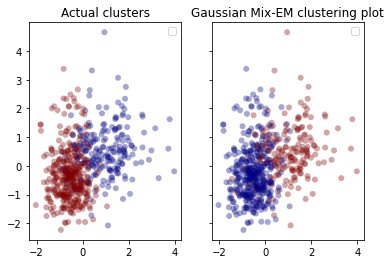

In [62]:
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=df["target"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")
ax1.legend()

ax2.scatter(X[:,0], X[:,1], c=gm_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Gaussian Mix-EM clustering plot")
ax2.legend()
f.show()

In [63]:
# Plot decision boundries

In [ ]:
# Plot contour

In [ ]:
# Optimization - How to otimize GMM?

In [ ]:
# b) Evaluate the clusteringmethods using appropriate metrics such as theAdjusted Rand index, Homogeneity, Completeness and V-Measure, using the ground truth
# Evaluation Techniques --> https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
# Adjusted Rand index, Homogeneity, Completeness and V-Measure, using the ground truth.


In [ ]:
# c) Consider  and implement  any  configuration  of  the  parameters  of  your  classification methods that could further improve the results.

# Part III Application: Classification: Training and Testing

In [ ]:
# Train Test Split using StratifiedKFold 
#Stratified ensures equal distibution of the classes in the splits.
kf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1)
for i, [train_index, test_index] in enumerate(kf.split(X_train,  y_train)):
    print(f"In the {i+1}th split the test indexes are:\n{test_index}")
    print('---')

In the 1th split the test indexes are:
[ 13  15  22  23  26  42  45  50  51  70  84  94 105 106 118 138 142 158
 174 178 204 205 206 212 215 230 233 255 257 287 288 298 300 303 325 359
 375 382 385 392 394 398 399 417 423 453]
---
In the 2th split the test indexes are:
[  7  17  32  43  54  66  74  99 131 134 140 152 153 165 172 191 194 201
 211 224 235 248 260 265 276 279 282 294 321 340 347 357 367 370 377 389
 393 412 418 425 426 429 432 436 439 447]
---
In the 3th split the test indexes are:
[  0   4   8  40  41  44  48  68  80  90 114 121 123 124 126 127 149 151
 156 159 180 183 207 229 236 237 239 253 258 262 267 275 314 331 333 353
 361 380 402 407 410 414 430 440 451 452]
---
In the 4th split the test indexes are:
[ 33  36  60  69  71  73  88 100 103 108 115 116 130 135 146 188 198 199
 202 220 221 223 227 234 240 244 264 277 284 293 297 305 319 343 345 354
 366 372 376 388 391 396 397 401 419 420]
---
In the 5th split the test indexes are:
[ 31  47  58  59  63  93 110 111 122 

### Decision Trees

The decision tree classifier is able to partition data based on simple rules. Combinations of these simple rules can easily accomodate non-linear clusters of all shapes, sizes and complex relationships.

They can however be very prone to overfitting.

First we will look at a simple view of RFECV using an unbound (no limits) tree.
This is recursive feature elimination and will iteratively repeat many trees, in each step removing the feature (column) with the least importance.

The CV part of this is cross validation to reduce overfitting, but as we have discussed above this really is only one part of a solution to this problem.

In [ ]:
decision_classifier = DecisionTreeClassifier()
rfecv = RFECV(estimator = decision_classifier,
             step = 1,
             cv = 10)
rfecv.fit(X_train, y_train)

RFECV(cv=10, estimator=DecisionTreeClassifier())

In [ ]:
X.columns[rfecv.ranking_][:7]

Index(['mean symmetry', 'mean concave points', 'mean concavity',
       'mean compactness', 'mean smoothness', 'mean area', 'mean perimeter'],
      dtype='object')

In [ ]:
rfecv.score(X_train, y_train)

1.0

A perfect score of 1 was achieved on prediciting the training data. Now compare this to the predictive power on the test set.

In [ ]:
rfecv_decision_tree_predictions = rfecv.predict(X_test)
accuracy_score(y_test, rfecv_decision_tree_predictions)

0.9298245614035088

A high score indeed but a higher training than test score is a clear sign of overfitting. But first let us compare to feature importances calculated by the Random Trees Classifier without RFECV

Random Trees Classifier also has 

In [ ]:
decision_classifier_results = pd.DataFrame({'K_fold': [],
                                            'Homogeneity Score': [],
                                            'Completeness Score': [],
                                            'V_measure Score': [],
                                            'Accuracy Score': [],
                                            'Balanced Accuracy Score': [],
                                            'F1 Score': []})

In [ ]:
pca_X = pca.transform(X)

In [ ]:
pca_X_df = pd.DataFrame(pca_X)

In [ ]:
model_feature_importances = []
prediction_scores = []

training_scores = []
testing_scores = []

for i, [train_index, test_index] in enumerate(kf.split(X, y)):
  decision_classifier = DecisionTreeClassifier()
  decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  model_feature_importances.append(decision_classifier.feature_importances_)
  predictions = decision_classifier.predict(X.iloc[test_index])
  [h,c,v,a,b,f1] = classification_performance_evaluation(y.iloc[test_index], predictions)
  decision_classifier_results = decision_classifier_results.append({'K_fold': i,
                                                                    'Homogeneity Score': h,
                                                                    'Completeness Score': c,
                                                                    'V_measure Score': v,
                                                                    'Accuracy Score': a,
                                                                    'Balanced Accuracy Score': b,
                                                                    'F1 Score': f1}, ignore_index = True)
    
  train_predictions = decision_classifier.predict(X.iloc[train_index])
  test_predictions = decision_classifier.predict(X.iloc[test_index])
  training_scores.append(accuracy_score(y.iloc[train_index], train_predictions))
  testing_scores.append(accuracy_score(y.iloc[test_index], test_predictions))

training_score = np.mean(training_scores)
testing_score = np.mean(testing_scores)
print(f"Average Training score is {training_score}")
print(f"Average Testing score is {testing_score}")

Average Training score is 1.0
Average Testing score is 0.9368107769423559


In [ ]:
decision_tree_feature_importance_df = pd.DataFrame({'importance':np.mean( model_feature_importances, axis = 0)}).sort_values(by = 'importance', ascending = False)

print(f"The top 7 most important features and their importances are: \n")
for i, column in enumerate(X.columns[decision_tree_feature_importance_df[:7].index]):
    print(f"Column {column} has importance {decision_tree_feature_importance_df.iloc[i].values[0]:.4f} \n")

The top 7 most important features and their importances are: 

Column multiple_of_worst_features has importance 0.6852 

Column multiple_of_mean_features has importance 0.0767 

Column sum_of_worst_features has importance 0.0469 

Column mean concave points has importance 0.0323 

Column worst - mean area has importance 0.0214 

Column ratio of worst to mean area has importance 0.0178 

Column mean_of_worst_features has importance 0.0171 



In [ ]:
top_decision_tree_importances = []
for column_index in decision_tree_feature_importance_df[:7].index:
  top_decision_tree_importances.append([X_train.columns[column_index]][0])

In [ ]:
pca_decision_classifier_results = pd.DataFrame({'K_fold': [],
                                            'Homogeneity Score': [],
                                            'Completeness Score': [],
                                            'V_measure Score': [],
                                            'Accuracy Score': [],
                                            'Balanced Accuracy Score': [],
                                            'F1 Score': []})

pca_training_scores = []
pca_testing_scores = []


pca_model_feature_importances = []
pca_prediction_scores = []
pca_decision_classifier = DecisionTreeClassifier()
for i, [train_index, test_index] in enumerate(kf.split(pca_X, y)):
  pca_decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  pca_model_feature_importances.append(pca_decision_classifier.feature_importances_)
  predictions = pca_decision_classifier.predict(X.iloc[test_index])
  [h,c,v,a,b,f1] = classification_performance_evaluation(y.iloc[test_index], predictions)
  pca_decision_classifier_results = pca_decision_classifier_results.append({'K_fold': i,
                                                                            'Homogeneity Score': h,
                                                                            'Completeness Score': c,
                                                                            'V_measure Score': v,
                                                                            'Accuracy Score': a,
                                                                            'Balanced Accuracy Score': b,
                                                                            'F1 Score': f1}, ignore_index = True)
    
  pca_train_predictions = decision_classifier.predict(X.iloc[train_index])
  pca_test_predictions = decision_classifier.predict(X.iloc[test_index])
  pca_training_scores.append(accuracy_score(y.iloc[train_index], pca_train_predictions))
  pca_testing_scores.append(accuracy_score(y.iloc[test_index], pca_test_predictions))

training_score = np.mean(training_scores)
testing_score = np.mean(testing_scores)
print(f"Average Training score is {training_score}")
print(f"Average Testing score is {testing_score}")

Average Training score is 1.0
Average Testing score is 0.9368107769423559


Same scores are achieved with or without PCA.

In [ ]:
pca_decision_tree_feature_importance_df = pd.DataFrame({'importance':np.mean( pca_model_feature_importances, axis = 0)}).sort_values(by = 'importance', ascending = False)

pca_X_df = pd.DataFrame(pca_X)
print(f"The top 7 most important features and their importances are: \n")
for i, column in enumerate(pca_X_df.columns[pca_decision_tree_feature_importance_df[:7].index]):
    print(f"Column {column} has importance {pca_decision_tree_feature_importance_df.iloc[i].values[0]:.4f} \n")

The top 7 most important features and their importances are: 

Column 66 has importance 0.6838 

Column 54 has importance 0.0759 

Column 63 has importance 0.0464 

Column 7 has importance 0.0338 

Column 67 has importance 0.0243 

Column 43 has importance 0.0221 

Column 40 has importance 0.0187 



PCA importances are similarly scaled as compared to their non PCA forms

In [ ]:
decision_feature_importance = pd.DataFrame({'RFECV_Importances': X.columns[rfecv.ranking_][:7], 
                                            "Decision_Tree_Importances": top_decision_tree_importances})
decision_feature_importance

RFECV_Importances    Decision_Tree_Importances
0        mean symmetry   multiple_of_worst_features
1  mean concave points    multiple_of_mean_features
2       mean concavity        sum_of_worst_features
3     mean compactness          mean concave points
4      mean smoothness            worst - mean area
5            mean area  ratio of worst to mean area
6       mean perimeter       mean_of_worst_features

In [ ]:
df.corr()['target'].sort_values()[:7]

worst concave points     -0.793566
worst perimeter          -0.782914
mean concave points      -0.776614
worst radius             -0.776454
min_of_mean_features     -0.761568
mean perimeter           -0.742636
mean_of_worst_features   -0.740038
Name: target, dtype: float64

In [ ]:
print(f"The features seen in the top 7 linear correlation and in the top 7 RFECV importances are: {set(df.corr()['target'].sort_values()[:7].index).intersection(set(decision_feature_importance['RFECV_Importances']))}")

The features seen in the top 7 linear correlation and in the top 7 RFECV importances are: {'mean concave points', 'mean perimeter'}


In [ ]:
print(f"The features seen in the top 7 linear correlation and in the top 7 Decision Tree importances are: {set(df.corr()['target'].sort_values()[:7].index).intersection(set(decision_feature_importance['Decision_Tree_Importances']))}")

The features seen in the top 7 linear correlation and in the top 7 Decision Tree importances are: {'mean concave points', 'mean_of_worst_features'}


In [ ]:
print(f"The features seen in the top 7 RFECV importances correlation and in the top 7 Decision Tree importances are: {set(set(decision_feature_importance['RFECV_Importances'])).intersection(set(decision_feature_importance['Decision_Tree_Importances']))}")

The features seen in the top 7 RFECV importances correlation and in the top 7 Decision Tree importances are: {'mean concave points'}


Very interesting to see very little overlap between these 3 methods of determining importance

Clearly in multiple dimensions (combined with decision trees unique splitting methods), the strongest linearly sepearable variables are less significant.

In [ ]:
pd.DataFrame({"Decision Tree CV Average Results" : decision_classifier_results.mean().drop('K_fold').apply(lambda x: f"{x:.4f}"),
              "PCA Decision Tree CV Average Results" : pca_decision_classifier_results.mean().drop('K_fold').apply(lambda x: f"{x:.4f}")})

Decision Tree CV Average Results PCA Decision Tree CV Average Results
Homogeneity Score                                 0.7151                               0.7169
Completeness Score                                0.7158                               0.7181
V_measure Score                                   0.7153                               0.7174
Accuracy Score                                    0.9451                               0.9491
Balanced Accuracy Score                           0.9424                               0.9458
F1 Score                                          0.9560                               0.9593

### Improving the decision tree

In [ ]:
#The code below takes significant runtime ~15minutes. Will be saved to a csv on github and loaded from there to minimise ipynb runtime 
"""
decision_tree_hyperparameter_tuning_df = pd.DataFrame({'criterion': [],
                                                       'splitter': [],
                                                       'max_depth': [],
                                                       'min_samples_split' : [],
                                                       'min_samples_leaf' : [],
                                                       'max_leaf_nodes' : [],
                                                       'training_prediction_score' : [],
                                                       'Homogeneity Score': [],
                                                       'Completeness Score': [],
                                                       'V_measure Score': [],
                                                       'Accuracy Score': [],
                                                       'Balanced Accuracy Score': [],
                                                       'F1 Score': [],
                                                       })
for criterion in ['gini', 'entropy']:
  for splitter in ['best', 'random']:
    for max_depth in [1,2,3,4,5,6,7,8]:
      for min_samples_split in np.arange(2,501,50):
        for min_samples_leaf in np.arange(1,250,50):
          for max_leaf_nodes in np.arange(2,20):
            decision_tree = DecisionTreeClassifier(criterion = criterion,
                                                   splitter= splitter,
                                                   max_depth = max_depth,
                                                   min_samples_split = min_samples_split,
                                                   min_samples_leaf = min_samples_leaf,
                                                   max_leaf_nodes = max_leaf_nodes)
            
            decision_tree.fit(X_train, y_train)
            predictions = decision_tree.predict(X_test)
            training_predictions = decision_tree.predict(X_train)
            training_prediction_score = accuracy_score(y_train, training_predictions)
            h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, predictions, print_output = False)
            decision_tree_hyperparameter_tuning_df = decision_tree_hyperparameter_tuning_df.append({'criterion': criterion,
                                                       'splitter': splitter,
                                                       'max_depth': max_depth,
                                                       'min_samples_split' : min_samples_split,
                                                       'min_samples_leaf' : min_samples_leaf,
                                                       'max_leaf_nodes' : max_leaf_nodes,
                                                       'training_prediction_score' : training_prediction_score,
                                                       'Homogeneity Score': h,
                                                       'Completeness Score': c,
                                                       'V_measure Score': v,
                                                       'Accuracy Score': acc_score,
                                                       'Balanced Accuracy Score': bal_acc_score,
                                                       'F1 Score': score_f1,
                                                       }, ignore_index = True) 
"""  
#Note the code above takes significant run time.
#For simplicity it was saved as below to github page 
#and will be loaded from there            

"\ndecision_tree_hyperparameter_tuning_df = pd.DataFrame({'criterion': [],\n                                                       'splitter': [],\n                                                       'max_depth': [],\n                                                       'min_samples_split' : [],\n                                                       'min_samples_leaf' : [],\n                                                       'max_leaf_nodes' : [],\n                                                       'training_prediction_score' : [],\n                                                       'Homogeneity Score': [],\n                                                       'Completeness Score': [],\n                                                       'V_measure Score': [],\n                                                       'Accuracy Score': [],\n                                                       'Balanced Accuracy Score': [],\n                                        

In [ ]:
#saved to csv
'''
top_30_decision_tree = decision_tree_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)
top_30_decision_tree.to_csv('top_30_decision_tree.csv')
'''

In [ ]:
#load from csv
top_30_decision_tree = pd.read_csv('https://raw.githubusercontent.com/adbandy/data_files/main/top_30_decision_tree%20(1).csv', index_col = 0)
top_30_decision_tree

criterion splitter  ...  Balanced Accuracy Score  F1 Score
0    entropy   random  ...                 0.964286  0.979592
1       gini   random  ...                 0.964286  0.979592
2    entropy   random  ...                 0.952381  0.972973
3       gini     best  ...                 0.952381  0.972973
4    entropy     best  ...                 0.957341  0.972603
5       gini   random  ...                 0.952381  0.972973
6    entropy   random  ...                 0.952381  0.972973
7    entropy   random  ...                 0.952381  0.972973
8    entropy   random  ...                 0.962302  0.972222
9    entropy   random  ...                 0.957341  0.972603
10   entropy     best  ...                 0.957341  0.972603
11   entropy   random  ...                 0.952381  0.972973
12      gini   random  ...                 0.957341  0.972603
13      gini     best  ...                 0.952381  0.972973
14   entropy     best  ...                 0.945437  0.965986
15      gini     best  ...                 0.940476  0.966443
16   entropy   random  ...                 0.945437  0.965986
17      gini   random  ...                 0.940476  0.966443
18   entropy   random  ...                 0.940476  0.966443
19      gini   random  ...                 0.940476  0.966443
20      gini   random  ...                 0.955357  0.965035
21      gini     best  ...                 0.945437  0.965986
22      gini     best  ...                 0.940476  0.966443
23      gini     best  ...                 0.940476  0.966443
24      gini   random  ...                 0.940476  0.966443
25      gini     best  ...                 0.940476  0.966443
26      gini     best  ...                 0.940476  0.966443
27      gini   random  ...                 0.945437  0.965986
28   entropy   random  ...                 0.945437  0.965986
29      gini   random  ...                 0.945437  0.965986

[30 rows x 13 columns]

In [ ]:
print(f"The top parameters for accuracy score in Decision Tree Classifier are:\n\n{top_30_decision_tree.iloc[0,:6]}")

The top parameters for accuracy score in Decision Tree Classifier are:

criterion            entropy
splitter              random
max_depth                6.0
min_samples_split        2.0
min_samples_leaf         1.0
max_leaf_nodes           9.0
Name: 0, dtype: object


In [ ]:
top_parameter_decision_tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 6, min_samples_split = 2, min_samples_leaf= 1, max_leaf_nodes = 9)
top_parameter_decision_tree.fit(X_train, y_train)
top_parameter_decision_tree_predictions = top_parameter_decision_tree.predict(X_test)


Now lets plot some metric graphics. Note these graphs assume 1 is a positive label. Our data actually shows 1 is a negative label (for benign) first need to transform the data to reflect this.

In [ ]:
#change ones to zeros and zeros to ones so one will represent Malignant.
y_test_inverted = 1 - y_test
top_parameter_decision_tree_predictions_inverted = 1 - top_parameter_decision_tree_predictions

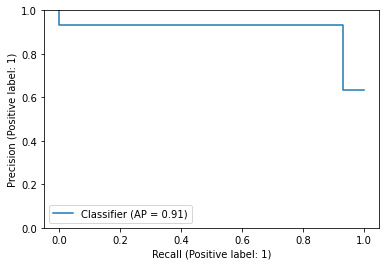

In [ ]:
plot_precision_recall(y_test_inverted, top_parameter_decision_tree_predictions_inverted)

A perfect graph here would be a horizontal line at 1 and vertical line at 1. 

Precision measures the true positives divided by (true positive + false positives)

Recall measures the true positives divided by (true positive + false negative)

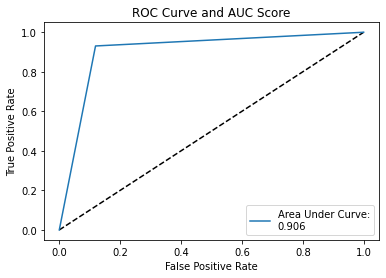

In [ ]:
plot_roc_and_print_auc(y_test, top_parameter_decision_tree_predictions)

True positive rate is true positive divided by (true positives + false positives)

False positive rate is false positive divided by (true negatives + false negatives)

ROC curve then plots these two rates against each other.

A perfect curve is actually a vertical line at zero and horizontal line at 1.

The area under this perfect curve is then (1x1) = 1. 

0.906 is a very high score.

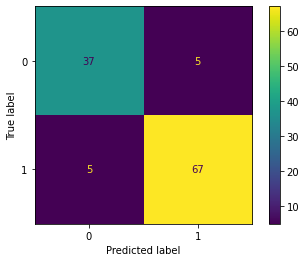

In [ ]:
plot_confusion_matrix(y_test, top_parameter_decision_tree_predictions)

The confusion matrix then gives an overview of how many values were in each of 4 categories and coordinates [predicted, true] of:

False Negative = [0,1]

True Negative = [1,1]

True Positive = [1,0]

False Positive = [0,1]

The best results are when the False positive and False negatives are relatively very small (or ideally zero). 

Predicting malignant cancer is good (37 correct, 5 wrong)

We are predicting benign values very well (67 correct, 5 wrong).

However predicting malignant cancer is clearly more important as if we get this wrong it could easily mean death.



Now lets use these parameters to perform the cross validation on these parameters.

In [ ]:
improved_decision_classifier_cv_models = []

for i, [train_index, test_index] in enumerate(kf.split(X, y)):
  improved_decision_classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 6, min_samples_split = 2, min_samples_leaf= 1, max_leaf_nodes = 9)
  improved_decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  improved_decision_classifier_cv_models.append(improved_decision_classifier)  

In [ ]:
improved_decision_classifier_cv_predictions = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                                                                       splitter = 'random',
                                                                                       max_depth = 6,
                                                                                       min_samples_split = 2,
                                                                                       min_samples_leaf= 1,
                                                                                       max_leaf_nodes = 9),
                                                                                       X,
                                                                                       y,
                                                                                       cv = 10)

In [ ]:
#change ones to zeros and zeros to ones so one will represent Malignant.
y_inverted = 1 - y
improved_decision_classifier_cv_predictions_inverted = 1 - improved_decision_classifier_cv_predictions

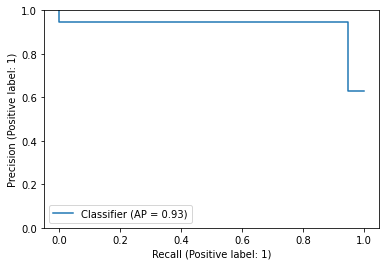

In [ ]:
plot_precision_recall(y_inverted, improved_decision_classifier_cv_predictions_inverted)

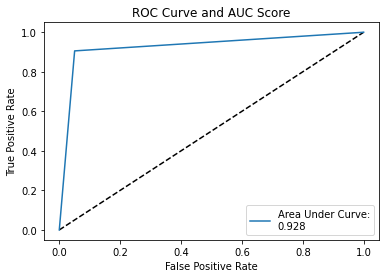

In [ ]:
plot_roc_and_print_auc(y, improved_decision_classifier_cv_predictions)

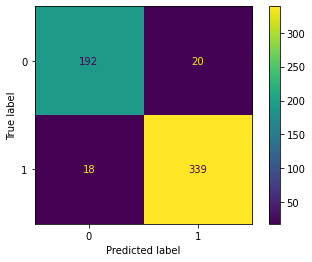

In [ ]:

plot_confusion_matrix(y, improved_decision_classifier_cv_predictions)

In [ ]:
print(f"Pre Cross Validation Ratios:\nTrue Positive / False Positive = {67/5:.2f}\
\nTrue Negative / False Negative = {37/5:.2f}\
\n\nPost Cross Validation Ratios:\nTrue Positive / False Positive = {339/18:.2f}\
\nTrue Negative / False Negative = {192/20:.2f}")

Pre Cross Validation Ratios:
True Positive / False Positive = 13.40
True Negative / False Negative = 7.40

Post Cross Validation Ratios:
True Positive / False Positive = 18.83
True Negative / False Negative = 9.60


In all three graphs we can see the scores have improved as CV has reduced the overfitting.

And we can see our ratio of correctly detecting malignant (true negative) has increased by ~30% increase

Next we will compare this with the PCA data

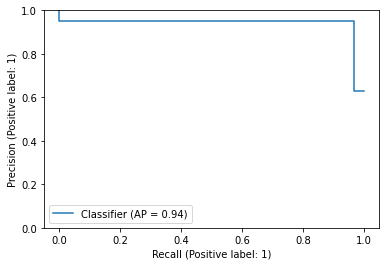

In [ ]:
pca_improved_decision_classifier_cv_predictions = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                                                                       splitter = 'random',
                                                                                       max_depth = 6,
                                                                                       min_samples_split = 2,
                                                                                       min_samples_leaf= 1,
                                                                                       max_leaf_nodes = 9),
                                                                                       pca_X,
                                                                                       y,
                                                                                       cv = 10)
y_inverted = 1 - y
pca_improved_decision_classifier_cv_predictions_inverted = 1 - pca_improved_decision_classifier_cv_predictions
plot_precision_recall(y_inverted, pca_improved_decision_classifier_cv_predictions_inverted)

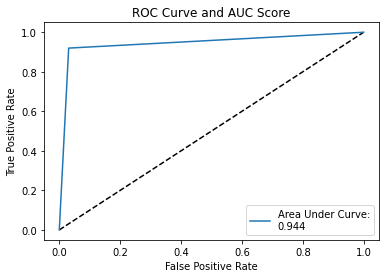

In [ ]:
plot_roc_and_print_auc(y, pca_improved_decision_classifier_cv_predictions)

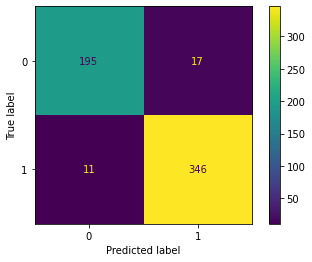

In [ ]:
plot_confusion_matrix(y, pca_improved_decision_classifier_cv_predictions)

PCA scores are even better.

Before we raised the question of improving the accuracy of determining malignant cancer at the expense of incorrectly determining benign cancer.

That is to say we could weight false negative (malignant reported as benign) as more important that false positive (benign reported as malignant).

This can be done with using the class weight parameter.

Class Weighting is Benign 1 : Malignant 1


<Figure size 720x720 with 0 Axes>

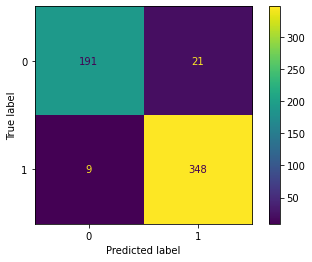

Class Weighting is Benign 2 : Malignant 1


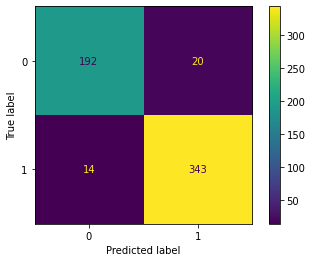

Class Weighting is Benign 3 : Malignant 1


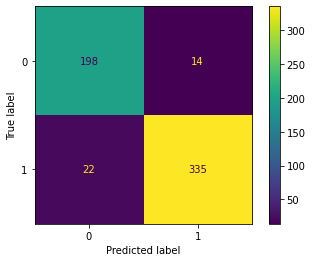

Class Weighting is Benign 4 : Malignant 1


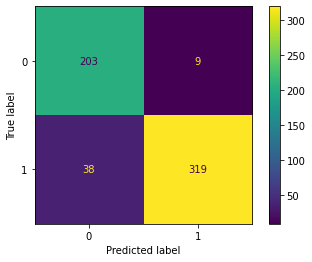

Class Weighting is Benign 5 : Malignant 1


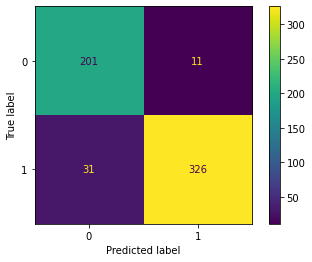

Class Weighting is Benign 6 : Malignant 1


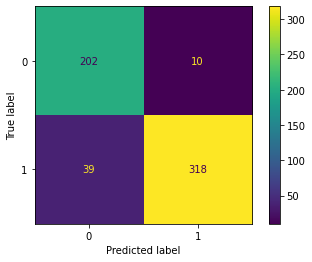

Class Weighting is Benign 7 : Malignant 1


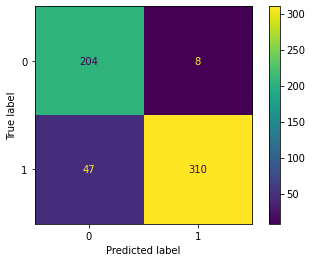

Class Weighting is Benign 8 : Malignant 1


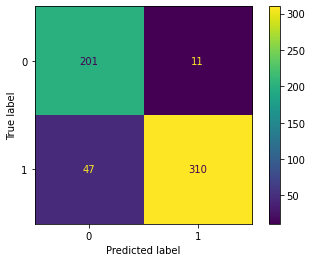

Class Weighting is Benign 9 : Malignant 1


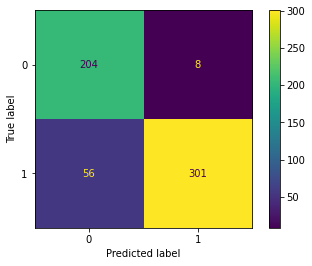

Class Weighting is Benign 10 : Malignant 1


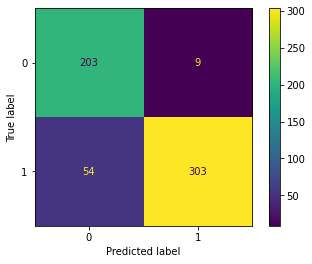

Class Weighting is Benign 11 : Malignant 1


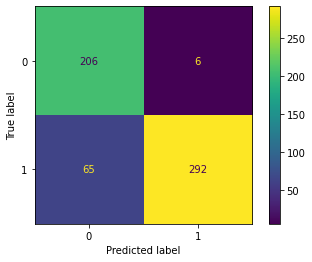

Class Weighting is Benign 12 : Malignant 1


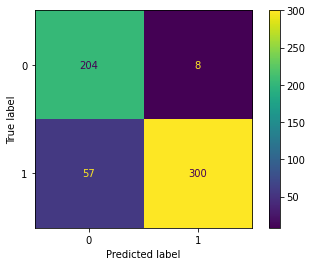

Class Weighting is Benign 13 : Malignant 1


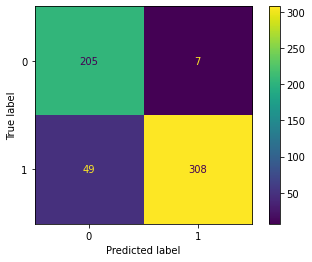

Class Weighting is Benign 14 : Malignant 1


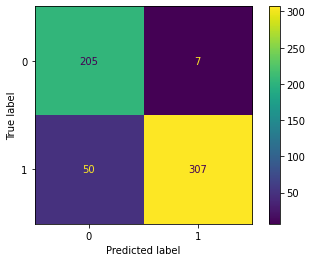

Class Weighting is Benign 15 : Malignant 1


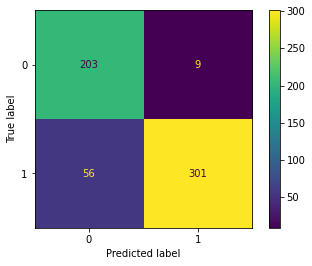

Class Weighting is Benign 16 : Malignant 1


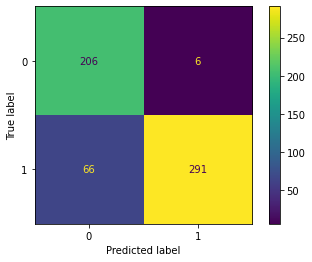

Class Weighting is Benign 17 : Malignant 1


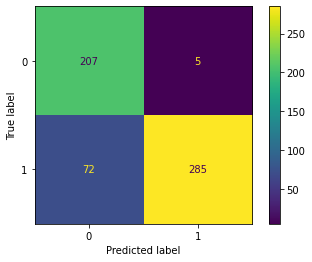

Class Weighting is Benign 18 : Malignant 1


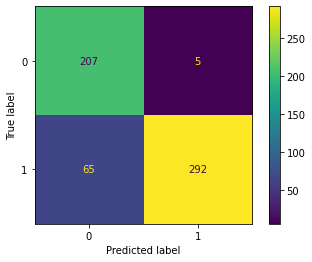

Class Weighting is Benign 19 : Malignant 1


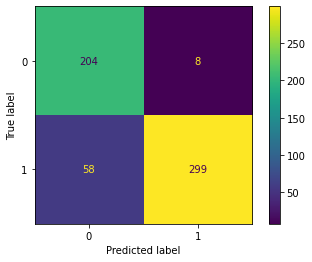

In [ ]:
fig = plt.figure(figsize = (10,10))
for i in range(1,20,1):
  class_weight = {0:i}
  pca_improved_decision_classifier_cv_predictions = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                                                                             splitter = 'random',
                                                                                             max_depth = 6,
                                                                                             min_samples_split = 2,
                                                                                             min_samples_leaf= 1,
                                                                                             max_leaf_nodes = 9,
                                                                                             class_weight = class_weight),
                                                                      pca_X,
                                                                      y,
                                                                      cv = 10)
  y_inverted = 1 - y
  pca_improved_decision_classifier_cv_predictions_inverted = 1 - pca_improved_decision_classifier_cv_predictions
  # fig.add_subplot(2,5, i+1)
  print(f"Class Weighting is Benign {i} : Malignant 1")
  plot_confusion_matrix(y, pca_improved_decision_classifier_cv_predictions)
  


In [ ]:
print("Potentially best trade off at weighting of 13:1 (benign : malignant")
print(f"Post Cross Validation Ratios:\nTrue Positive / False Positive = {339/18:.2f}\
\nTrue Negative / False Negative = {192/20:.2f}\
\n\n Best Post Weighting Cross Validation Ratios:\nTrue Positive / False Positive = {292/65:.2f}\
\nTrue Negative / False Negative = {206/6:.2f}")

Potentially best trade off at weighting of 13:1 (benign : malignant
Post Cross Validation Ratios:
True Positive / False Positive = 18.83
True Negative / False Negative = 9.60

 Best Post Weighting Cross Validation Ratios:
True Positive / False Positive = 4.49
True Negative / False Negative = 34.33


So what does this mean. It now means an improvemnent of correctly predicting malignant cancer from 90.5% to 97.2%. 

Correctly predicting benign cancer has reduced from 95.0% to 81.8%.

It is thought that this rebalancing is significant but obviously would be for medical professional to decide acceptable levels of risk.


# PART IV –Group Report